In [4]:
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user
!pip install plotly --user

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [1]:
import os
import pandas as pd
import scipy as sp
import numpy as np
import math
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
def rmse(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

def mae(y, y_pred):
    return np.mean(np.absolute(np.subtract(y, y_pred)))

def r2(y, y_pred):
    return 1 - np.sum((y - y_pred)**2)/np.sum((y - np.mean(y))**2)

def mape(y, y_pred):
    return (np.mean(np.divide(np.absolute(np.subtract(y,y_pred)), y))*100)

def errors(y, y_pred):
    return np.absolute(y - y_pred)

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                 14.0                 3.69      7586.243386   
1                                 20.0                 3.38      7204.924242   
2                                 15.0                 3.32     11586.428571   
3                                 13.0                 4.50      8476.666667   
4                                 23.0                 4.50      6534.500000   
..                                 ...                  ...              ...   
124                               10.0                 3.50      8383.939394   
125                                8.0                 3.60      7419.192547   
126                               15.0                 5.38     11044.670659   
127                               13.0                 5.38     10502.634731   
128                               15.0                 3.75      6746.722689   

     N_as_Urea_kg_per_Ha  N_as_Nitrate_kg_per_Ha  N_as_Ammonium_kg_per_Ha  \
0                  170.2                     0.0                      0.0   
1                  179.4                     0.0                      0.0   
2                    0.0                    23.0                      0.0   
3                  184.0                     0.0                     17.6   
4                   92.0                     0.0                     22.0   
..                   ...                     ...                      ...   
124                186.3                     0.0                      0.0   
125                 62.1                     0.0                      0.0   
126                128.8                     0.0                     24.2   
127                128.8                     0.0                     24.2   
128                128.8                     0.0                     24.2   

     P_as_Phosphorus_kg_per_Ha  P_as_P2O5_kg_per_Ha  K_as_Potassium_kg_per_Ha  \
0                          0.0                  0.0                       0.0   
1                          0.0                  0.0                       0.0   
2                         75.9                  0.0                       0.0   
3                          0.0                 83.2                       0.0   
4                          0.0                104.0                       0.0   
..                         ...                  ...                       ...   
124                        0.0                  0.0                       0.0   
125                        0.0                  0.0                       0.0   
126                        0.0                114.4                       0.0   
127                        0.0                114.4                       0.0   
128                        0.0                114.4                       0.0   

     K_as_K2O_kg_per_Ha  
0                   0.0  
1                  90.0  
2                   0.0  
3                 120.0  
4                 120.0  
..                  ...  
124               100.2  
125               181.2  
126                78.0  
127                81.0  
128                81.0  

[129 rows x 10 columns]

None


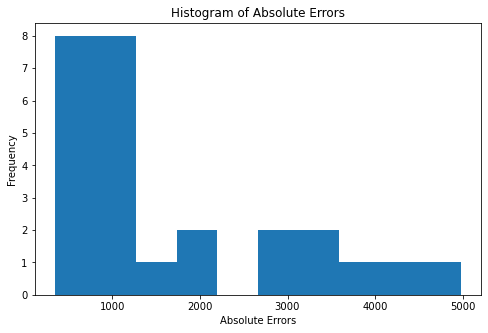

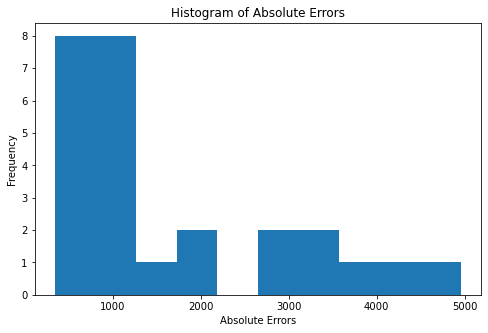

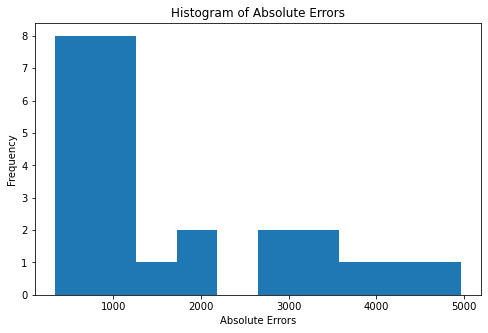

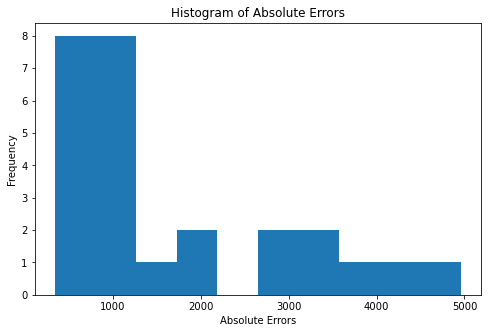

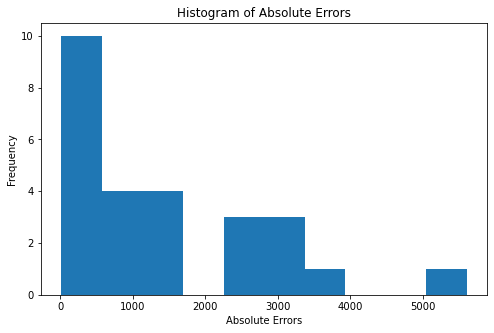

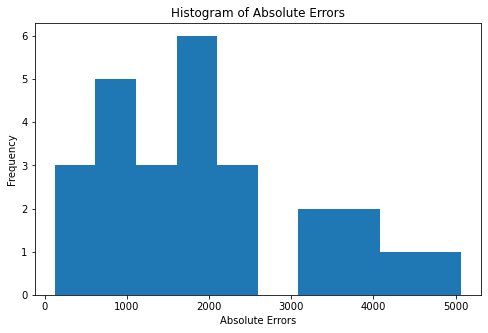

[19:45:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


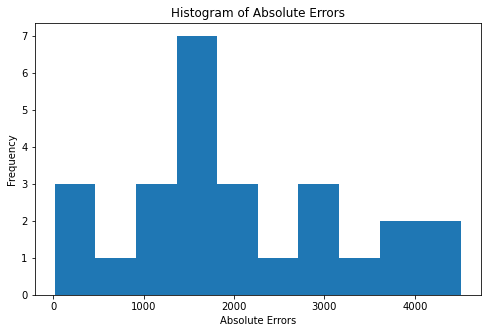

OLS
MAE on test data: 1612.5410675077749
RMSE on test data: 2100.127559697966
R squared on test data: -0.16303685691375036
MAPE on test data: 19.169304671821337


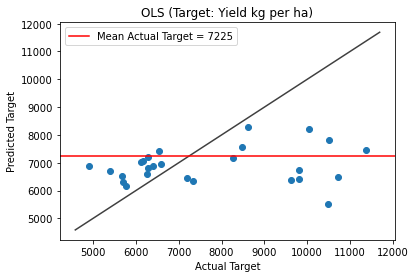

Lasso
MAE on test data: 1615.9942433953424
RMSE on test data: 2099.9089442136024
R squared on test data: -0.16279473387604937
MAPE on test data: 19.224765716610616


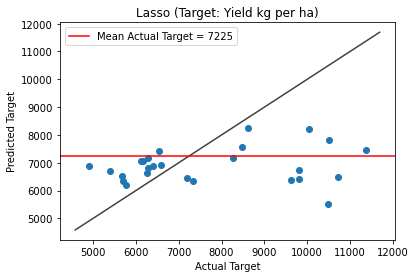

Ridge
MAE on test data: 1614.5946478862684
RMSE on test data: 2099.9221885421816
R squared on test data: -0.16280940163974877
MAPE on test data: 19.203202969899728


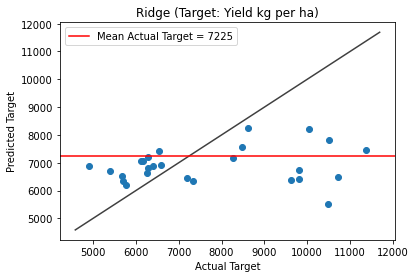

ElasticNet
MAE on test data: 1615.5556346043895
RMSE on test data: 2099.9265877296266
R squared on test data: -0.1628142736506324
MAPE on test data: 19.217742087218205


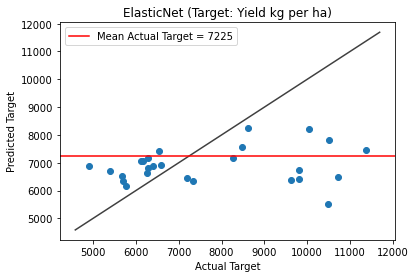

SVR
MAE on test data: 1449.6542809089
RMSE on test data: 1995.120165872249
R squared on test data: -0.04963969448957539
MAPE on test data: 16.59976479983046


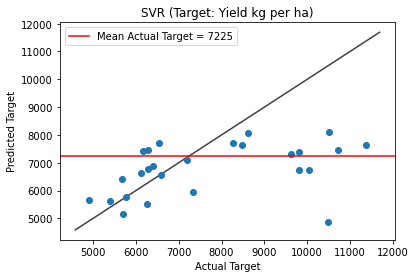

GBR
MAE on test data: 1960.770681799021
RMSE on test data: 2351.542309555047
R squared on test data: -0.4581685387041472
MAPE on test data: 25.650266723685807


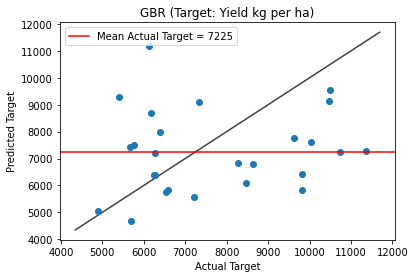

XGBoost
MAE on test data: 2026.6546562494768
RMSE on test data: 2371.7359617375614
R squared on test data: -0.4833198442915654
MAPE on test data: 26.624119493410564


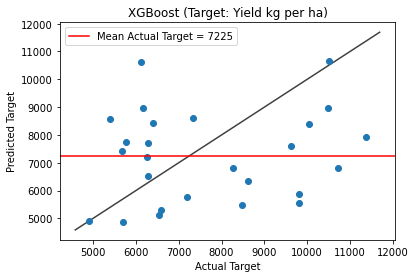

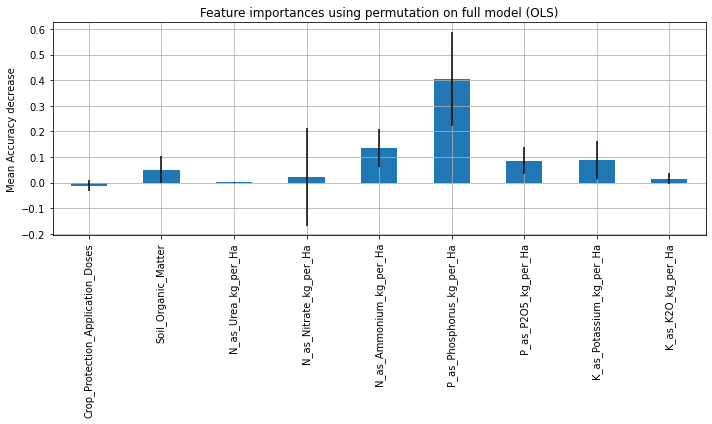

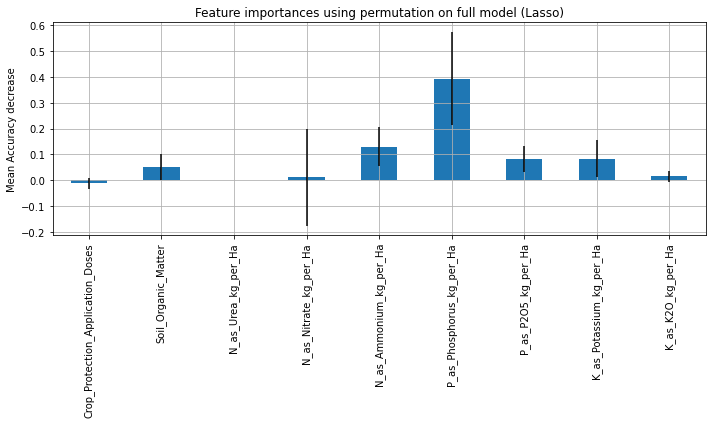

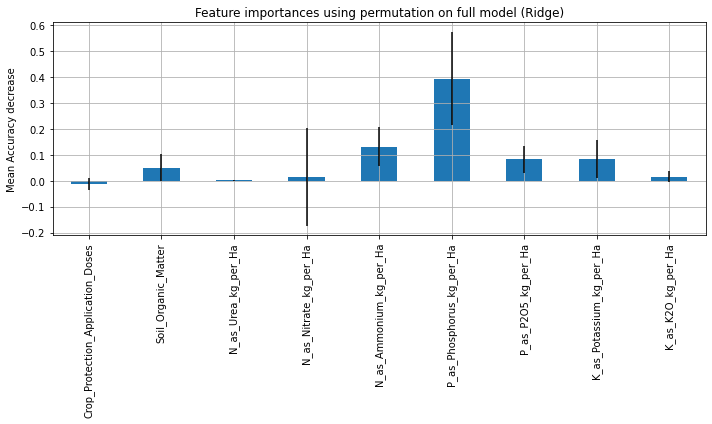

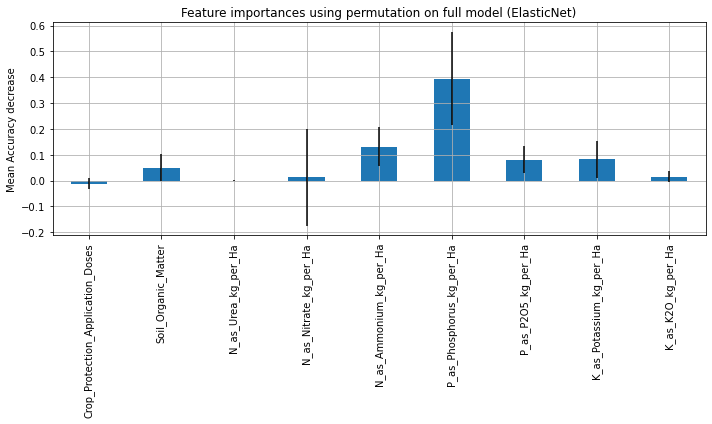

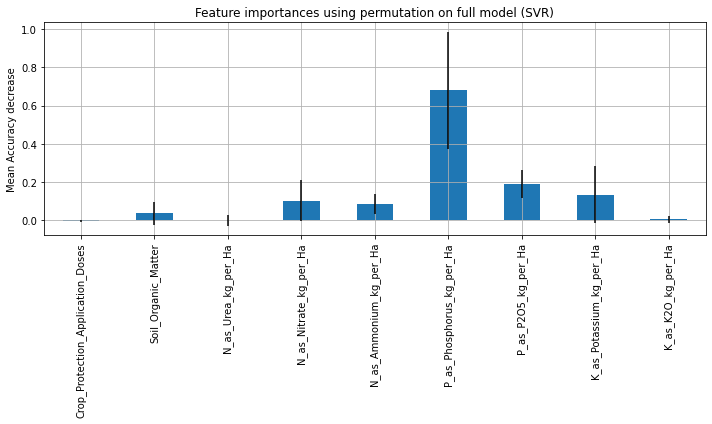

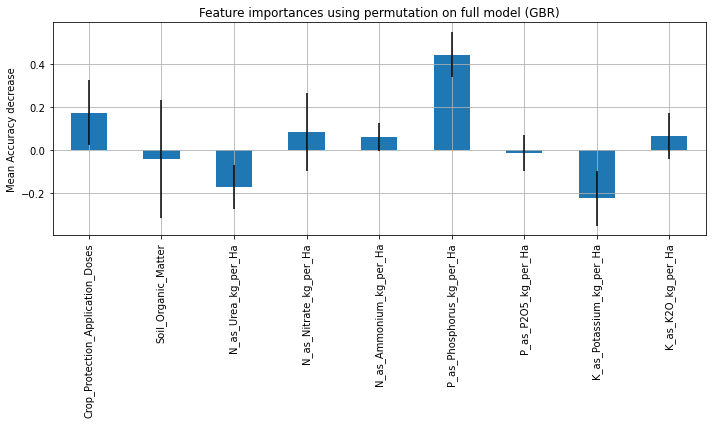

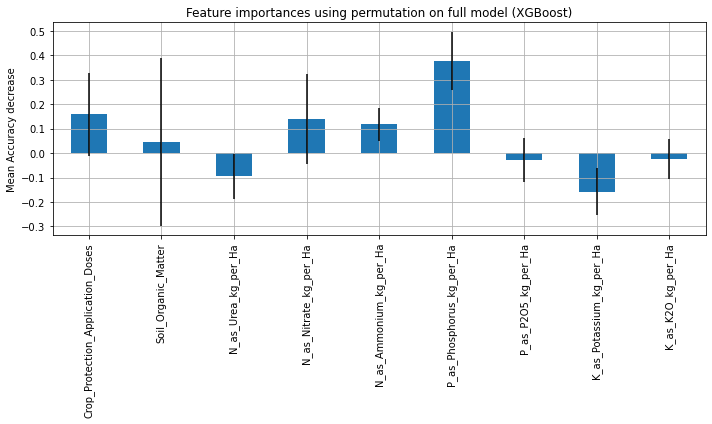

In [3]:
#Summer
#Soil_Organic_Matter Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])
print(display(df_SOM_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])
    
X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                 18.0             2.681429     11941.555556   
1                                 17.0             2.681429     10673.777778   
2                                 25.0             2.316250      6964.509804   
3                                 15.0             3.050000      6791.805556   
4                                 15.0             2.620000     10860.333333   
..                                 ...                  ...              ...   
281                               15.0             3.100000      6407.142857   
282                               15.0             2.100000      7456.000000   
283                               15.0             2.500000      7693.066667   
284                               16.0             2.690000      8992.923077   
285                               20.0             2.860000      9145.333333   

     N_as_Urea_kg_per_Ha  N_as_Nitrate_kg_per_Ha  N_as_Ammonium_kg_per_Ha  \
0                   0.00                   74.25                    74.25   
1                   0.00                   74.25                    74.25   
2                 187.68                    0.00                    24.20   
3                   0.00                   23.00                     0.00   
4                   0.00                   26.00                     0.00   
..                   ...                     ...                      ...   
281                92.00                   36.00                     0.00   
282                92.00                   36.00                     0.00   
283               165.60                   36.00                     0.00   
284               128.80                    0.00                    24.20   
285               128.80                    0.00                    24.75   

     P_as_Phosphorus_kg_per_Ha  P_as_P2O5_kg_per_Ha  K_as_Potassium_kg_per_Ha  \
0                          0.0                  0.0                       0.0   
1                          0.0                  0.0                       0.0   
2                          0.0                114.4                       0.0   
3                         75.9                  0.0                       0.0   
4                         85.8                  0.0                       0.0   
..                         ...                  ...                       ...   
281                       63.0                  0.0                     150.0   
282                      126.0                  0.0                     150.0   
283                       63.0                  0.0                      54.0   
284                        0.0                114.4                       0.0   
285                        0.0                117.0                       0.0   

     K_as_K2O_kg_per_Ha  
0                   0.0  
1                   0.0  
2                 120.0  
3                   0.0  
4                   0.0  
..                  ...  
281                 0.0  
282                 0.0  
283                96.0  
284                78.0  
285                84.0  

[286 rows x 10 columns]

None


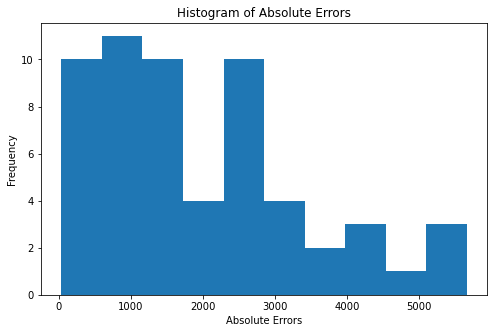

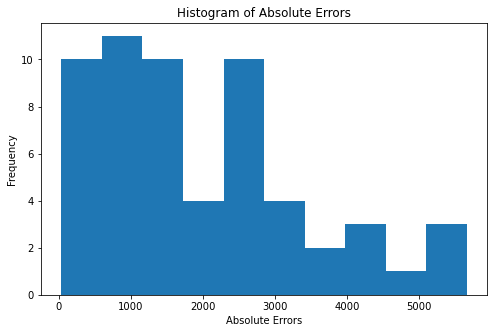

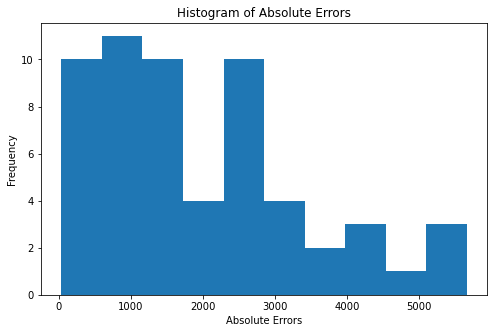

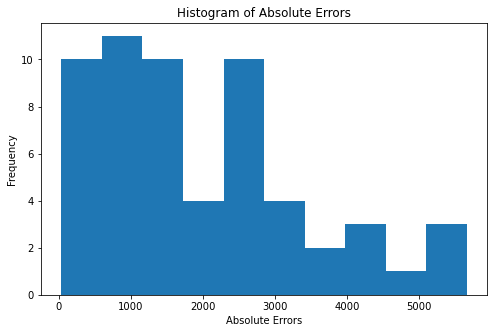

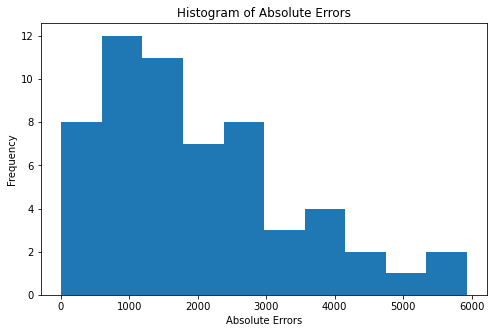

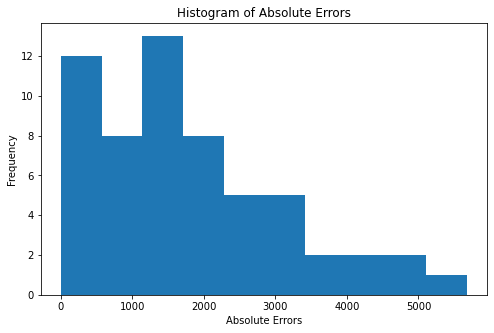

[19:46:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


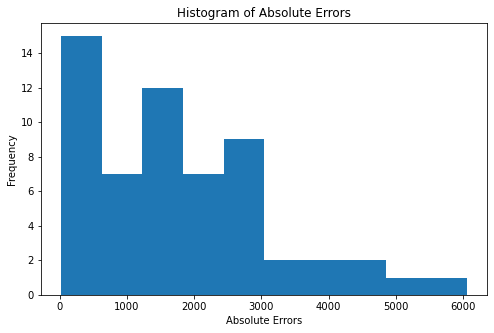

OLS
MAE on test data: 1995.5197446898155
RMSE on test data: 2437.341673611195
R squared on test data: 0.009179385975725873
MAPE on test data: 44.53183793828093


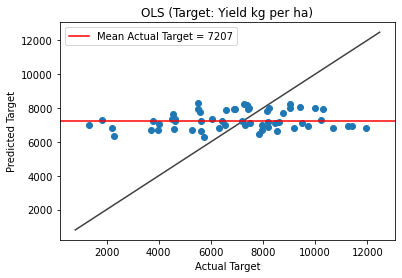

Lasso
MAE on test data: 1994.2310852594624
RMSE on test data: 2436.9278974992567
R squared on test data: 0.009515771395727568
MAPE on test data: 44.529652254266786


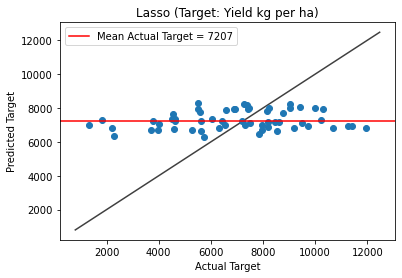

Ridge
MAE on test data: 1994.9679798111379
RMSE on test data: 2437.029333973991
R squared on test data: 0.009433312395133675
MAPE on test data: 44.52992130497073


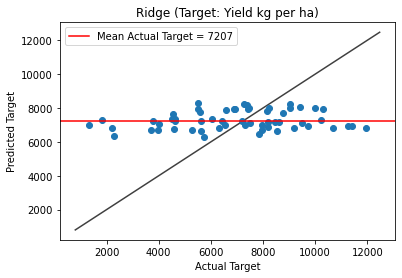

ElasticNet
MAE on test data: 1994.4621884928365
RMSE on test data: 2436.993559239356
R squared on test data: 0.009462394523764739
MAPE on test data: 44.52998435878411


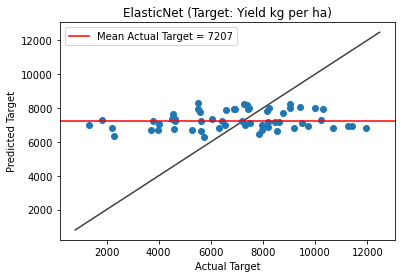

SVR
MAE on test data: 1999.58576368863
RMSE on test data: 2453.4012631555624
R squared on test data: -0.003920619673349446
MAPE on test data: 44.831596699316556


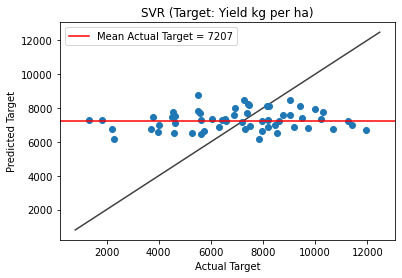

GBR
MAE on test data: 1773.5851495824124
RMSE on test data: 2213.3719788171957
R squared on test data: 0.18290788361461308
MAPE on test data: 36.3371701300586


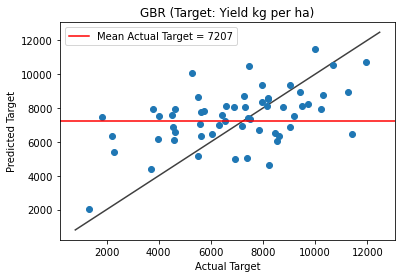

XGBoost
MAE on test data: 1777.441756881641
RMSE on test data: 2224.1208669015787
R squared on test data: 0.17495245812915683
MAPE on test data: 36.13394885076402


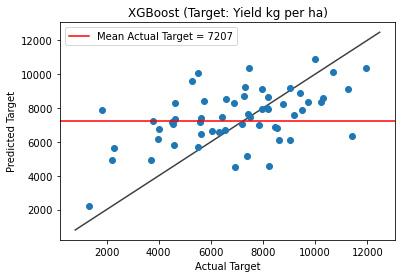

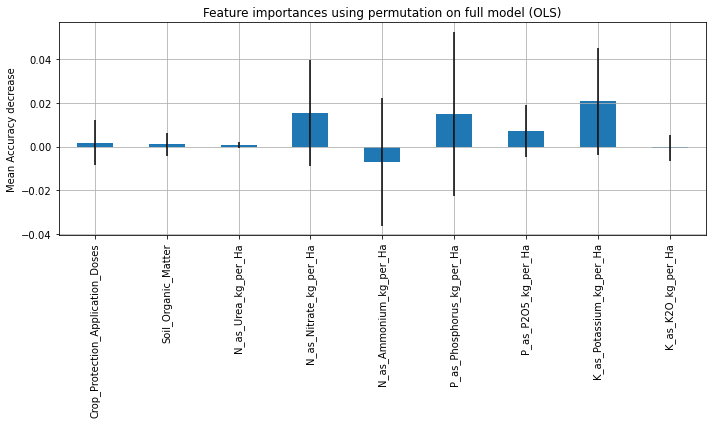

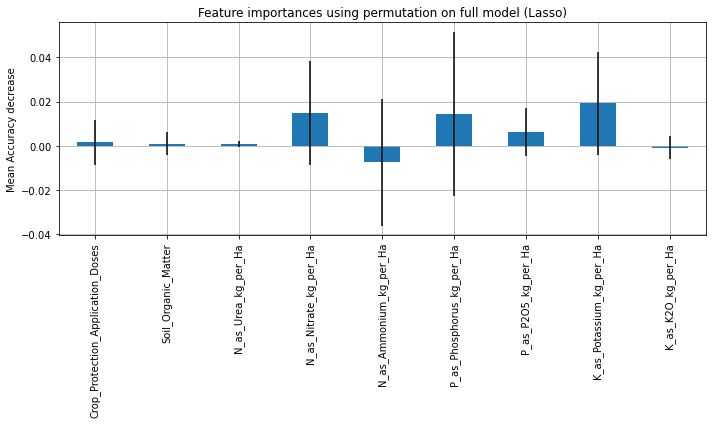

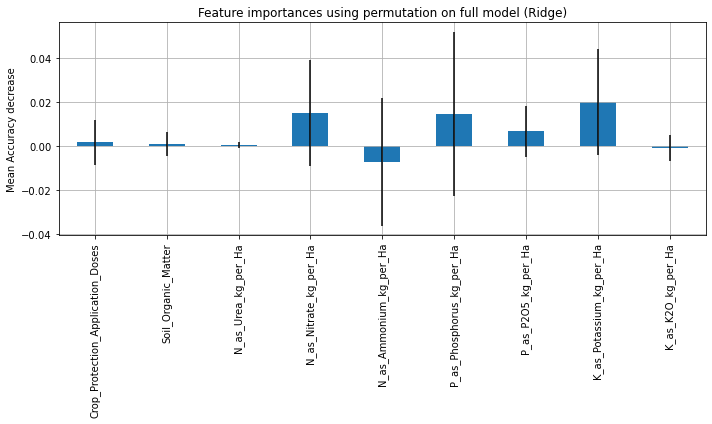

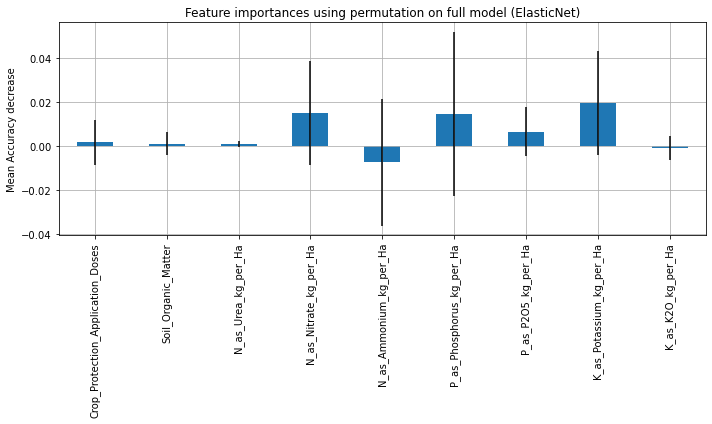

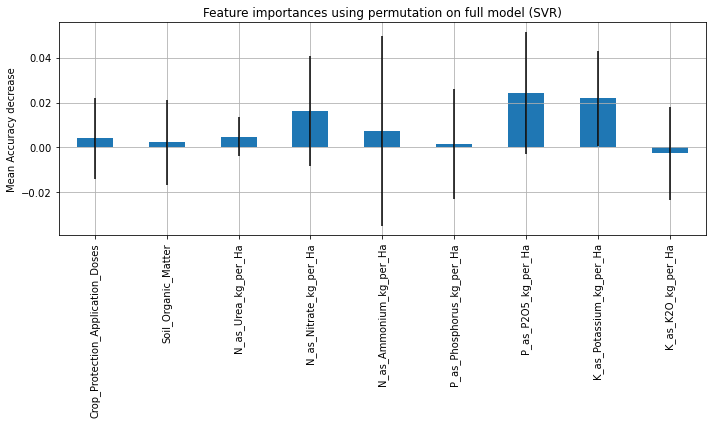

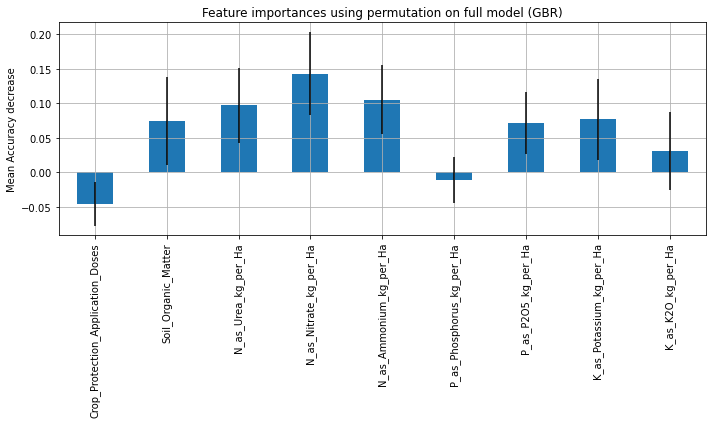

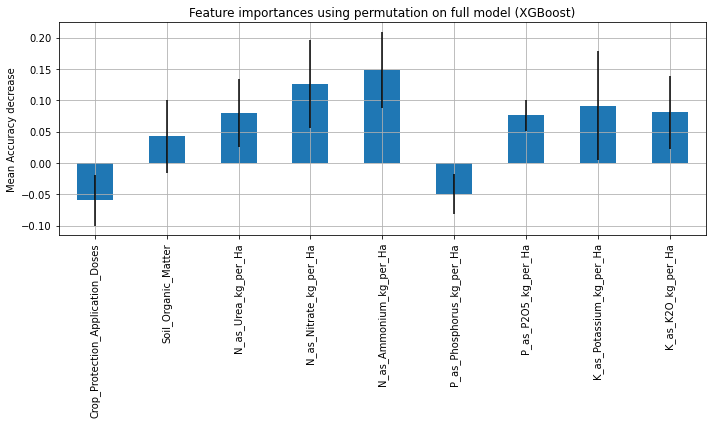

In [4]:
#Summer
#Soil_Organic_Matter Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])
print(display(df_SOM_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Winter
#Elbow method Soil Organic Matter

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
df = df.drop(columns = ['CO2_kg_per_Ha'])

sum_of_squared_distances = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1,11), sum_of_squared_distances, 'bx-')
plt.xlabel('Num Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                 14.0             2.500000      3049.333333   
1                                 18.0             2.500000      3575.055556   
2                                 13.0             2.500000      3116.200000   
3                                  9.0             2.500000      7678.888889   
4                                  9.0             2.500000      7756.363636   
..                                 ...                  ...              ...   
411                               19.0             2.812903      5610.597015   
412                               21.0             2.500000      6707.400000   
413                               22.0             2.910000      3566.612903   
414                               15.0             2.597851      4073.493976   
415                               19.0             2.930000      6969.636364   

     N_as_Urea_kg_per_Ha  N_as_Nitrate_kg_per_Ha  N_as_Ammonium_kg_per_Ha  \
0                   0.00                  205.50                     0.00   
1                 138.00                  108.00                     0.00   
2                 138.00                   60.00                     0.00   
3                 151.80                   18.00                    32.05   
4                 128.80                   18.00                    32.05   
..                   ...                     ...                      ...   
411                39.76                   24.92                   108.82   
412               115.00                   75.00                     0.00   
413               115.00                   75.00                     0.00   
414                92.00                    0.00                     0.00   
415                92.00                    0.00                     0.00   

     P_as_Phosphorus_kg_per_Ha  P_as_P2O5_kg_per_Ha  K_as_Potassium_kg_per_Ha  \
0                         48.0                  0.0                      48.0   
1                        108.0                  0.0                     108.0   
2                         60.0                  0.0                      60.0   
3                         90.0                  2.6                      96.0   
4                         90.0                  2.6                      90.0   
..                         ...                  ...                       ...   
411                        0.0                 98.8                       0.0   
412                        0.0                  0.0                      50.0   
413                        0.0                  0.0                      50.0   
414                        0.0                  0.0                       0.0   
415                        0.0                  0.0                       0.0   

     K_as_K2O_kg_per_Ha  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
..                  ...  
411                90.0  
412                 0.0  
413                 0.0  
414                 0.0  
415                 0.0  

[416 rows x 10 columns]

None


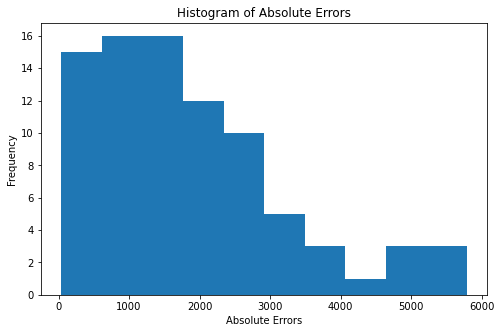

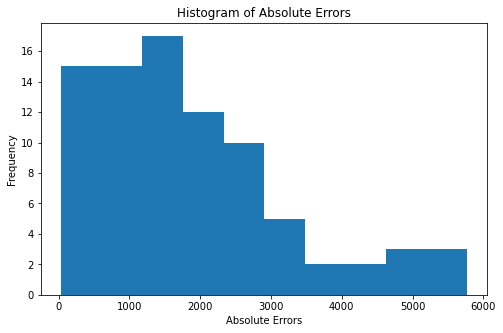

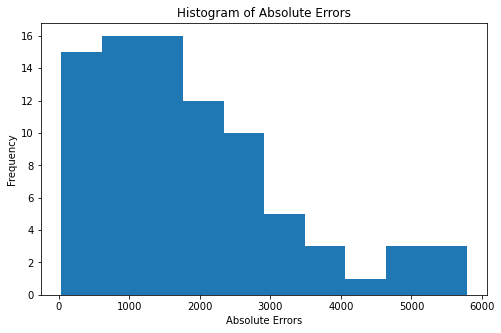

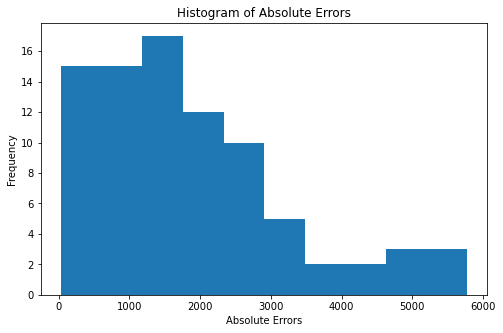

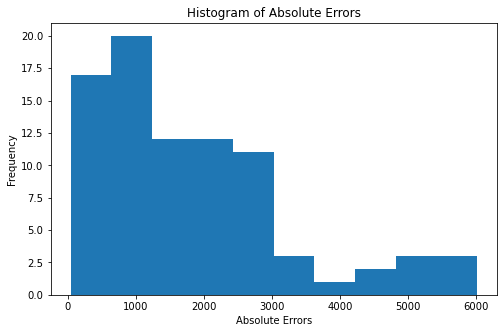

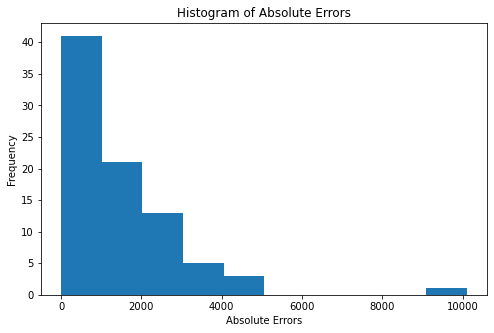

[19:47:18] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


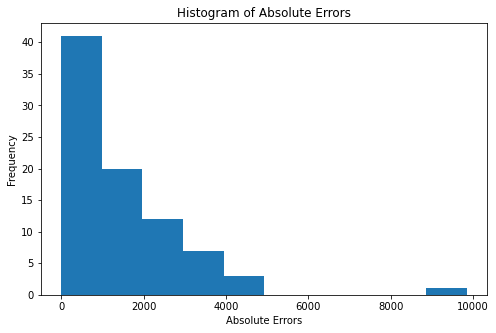

OLS
MAE on test data: 1856.541533170868
RMSE on test data: 2311.7008508525787
R squared on test data: -0.03151366971600633
MAPE on test data: 44.76692183852708


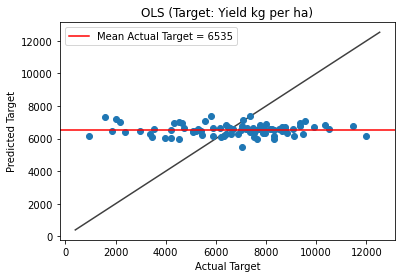

Lasso
MAE on test data: 1855.1312115476726
RMSE on test data: 2310.397622749702
R squared on test data: -0.030350959864053895
MAPE on test data: 44.751204182990165


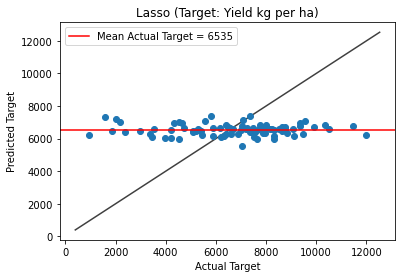

Ridge
MAE on test data: 1856.2111590529082
RMSE on test data: 2311.3774603768197
R squared on test data: -0.031225087079176816
MAPE on test data: 44.76276177883955


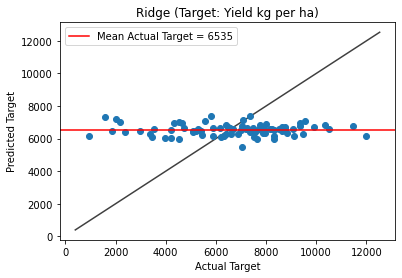

ElasticNet
MAE on test data: 1855.3063653932456
RMSE on test data: 2310.5587752716438
R squared on test data: -0.030494700876325664
MAPE on test data: 44.75315212635429


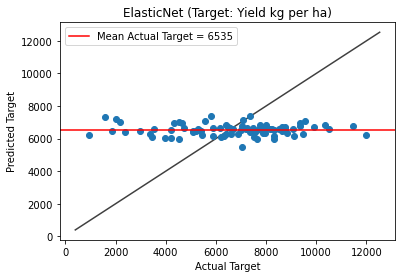

SVR
MAE on test data: 1815.773760529501
RMSE on test data: 2293.3137939750836
R squared on test data: -0.01516979753732084
MAPE on test data: 44.88862930355636


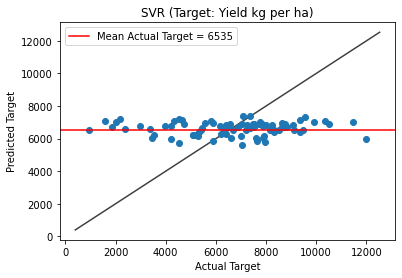

GBR
MAE on test data: 1492.5558373375727
RMSE on test data: 2120.4299035409913
R squared on test data: 0.13212023542969553
MAPE on test data: 34.86642688839676


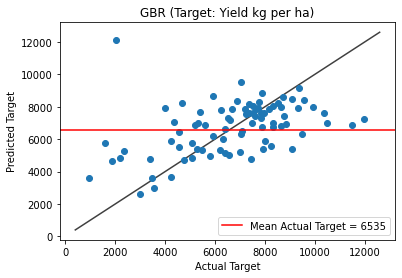

XGBoost
MAE on test data: 1444.898747847189
RMSE on test data: 2072.882408049432
R squared on test data: 0.17060568614549132
MAPE on test data: 35.283626607017396


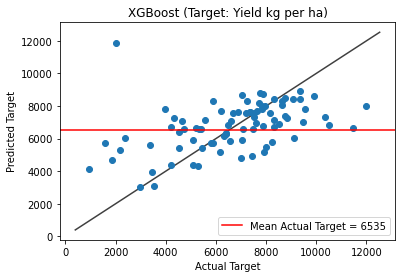

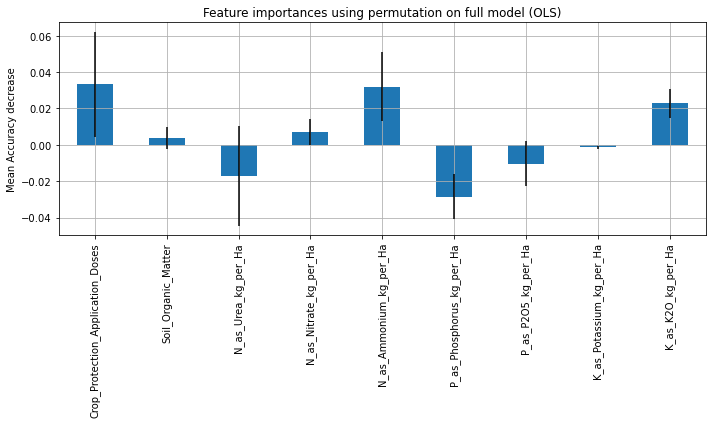

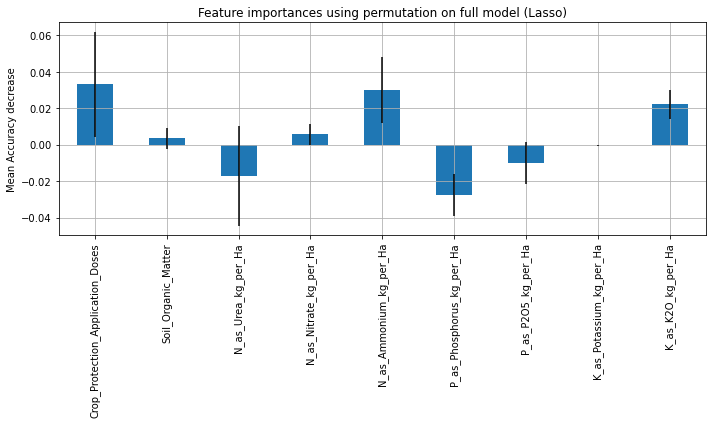

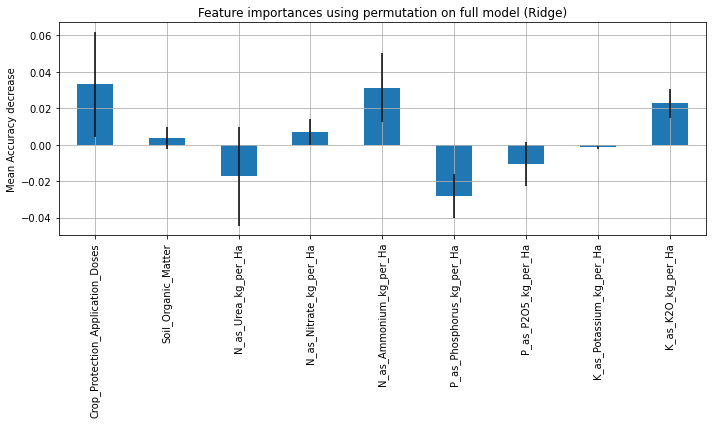

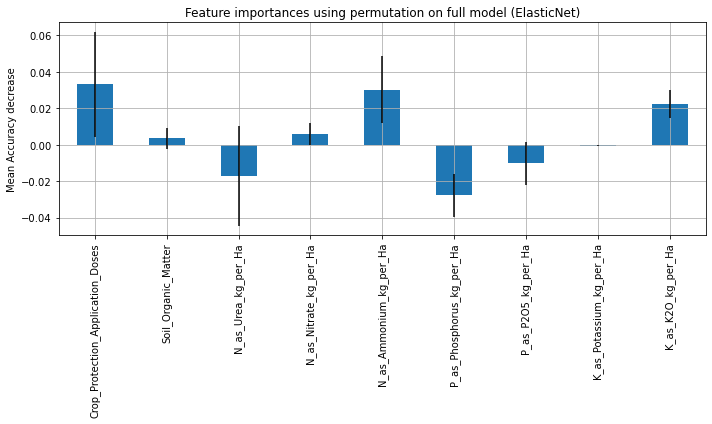

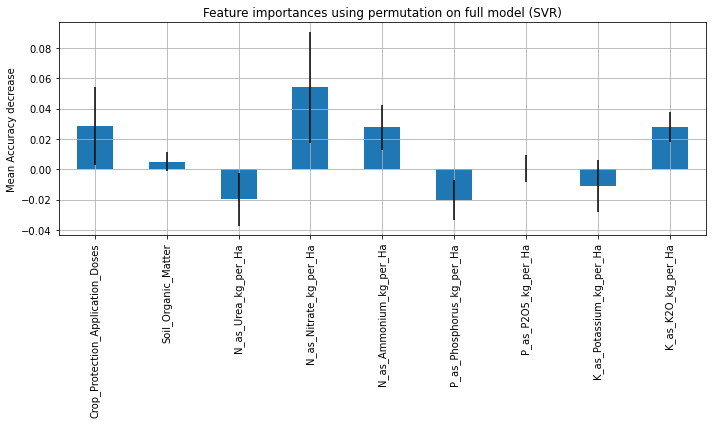

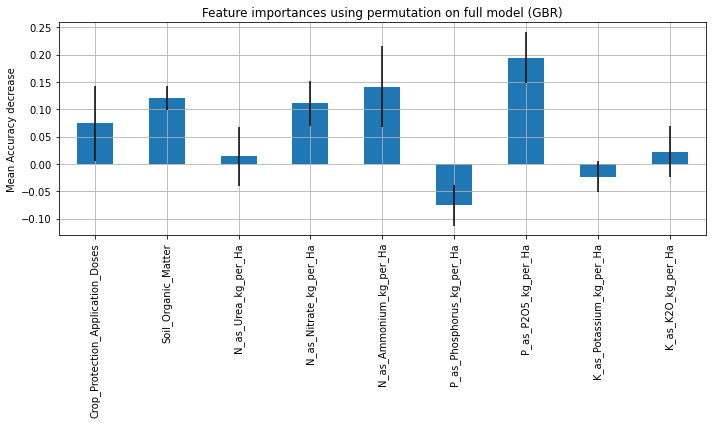

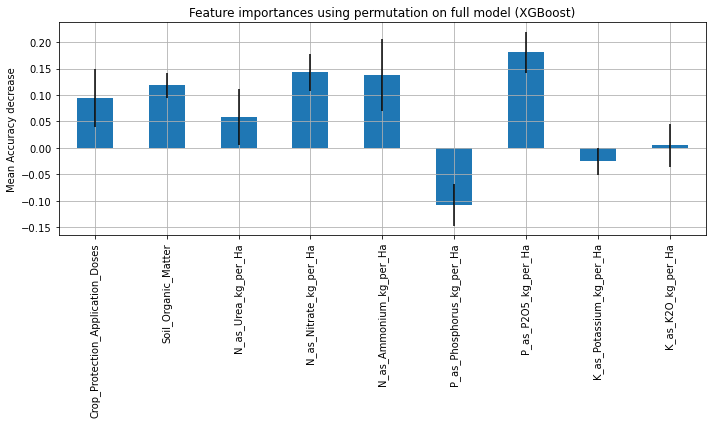

In [5]:
#Winter
#Soil_Organic_Matter Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])
print(display(df_SOM_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                20.0             3.950562      6921.797753   
1                                20.0             3.200000      6345.000000   
2                                22.0             3.400000      5768.148148   
3                                20.0             3.437500      7526.354167   
4                                15.0             3.330000      6480.000000   
..                                ...                  ...              ...   
84                               18.0             4.160000      5955.000000   
85                               18.0             3.346667      6105.581395   
86                               17.0             3.120000      6969.677419   
87                               17.0             3.240000      7954.666667   
88                               18.0             4.250000      6392.846154   

    N_as_Urea_kg_per_Ha  N_as_Nitrate_kg_per_Ha  N_as_Ammonium_kg_per_Ha  \
0                108.36                   16.02                   33.070   
1                 99.84                   10.68                   27.015   
2                 80.96                    0.00                   16.918   
3                  0.00                    0.00                   19.800   
4                184.00                    0.00                   29.700   
..                  ...                     ...                      ...   
84                92.00                   75.00                    0.000   
85               115.00                   75.00                    0.000   
86                92.00                    0.00                    0.000   
87               207.00                    0.00                    0.000   
88                92.00                    0.00                    0.000   

    P_as_Phosphorus_kg_per_Ha  P_as_P2O5_kg_per_Ha  K_as_Potassium_kg_per_Ha  \
0                         0.0               80.600                       0.0   
1                         0.0               77.220                       0.0   
2                         0.0               79.976                       0.0   
3                         0.0               93.600                       0.0   
4                         0.0              140.400                       0.0   
..                        ...                  ...                       ...   
84                        0.0                0.000                      50.0   
85                        0.0                0.000                      50.0   
86                        0.0                0.000                       0.0   
87                        0.0                0.000                       0.0   
88                        0.0                0.000                       0.0   

    K_as_K2O_kg_per_Ha  
0               111.00  
1               109.98  
2                98.16  
3               120.00  
4               138.00  
..                 ...  
84                0.00  
85                0.00  
86                0.00  
87                0.00  
88                0.00  

[89 rows x 10 columns]

None


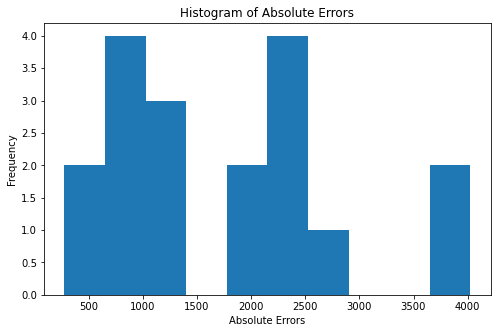

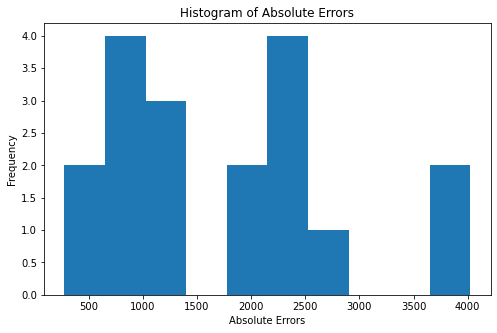

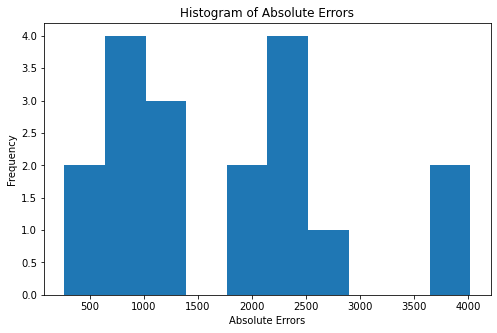

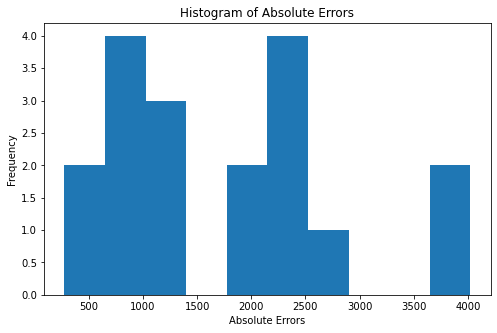

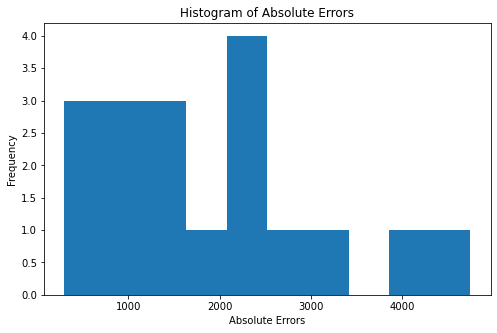

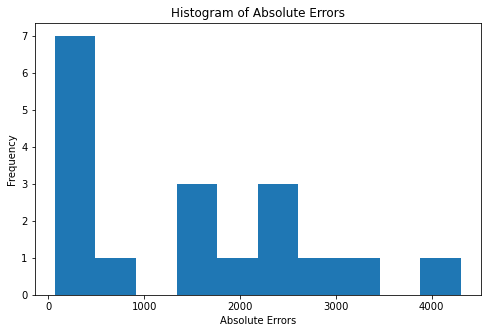

[19:49:29] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


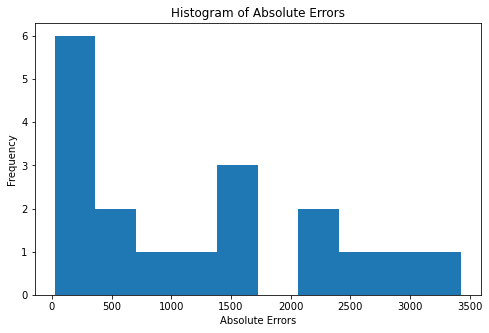

OLS
MAE on test data: 1756.5989311507833
RMSE on test data: 2063.0713409138657
R squared on test data: -0.5682554867691876
MAPE on test data: 26.352025655645576


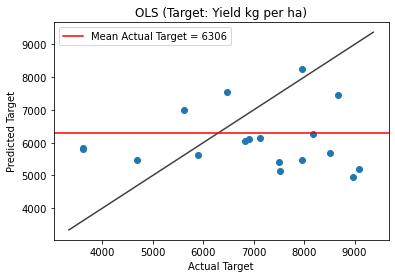

Lasso
MAE on test data: 1755.6539767180923
RMSE on test data: 2062.246910957243
R squared on test data: -0.5670023469051733
MAPE on test data: 26.33977171818368


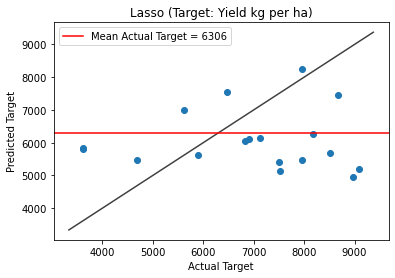

Ridge
MAE on test data: 1752.5087789576698
RMSE on test data: 2059.4064649769966
R squared on test data: -0.5626886828136286
MAPE on test data: 26.30708409465604


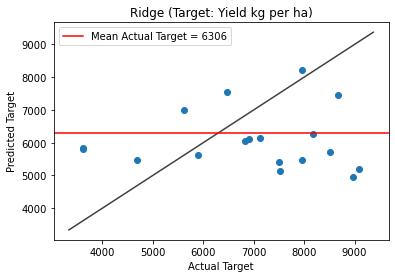

ElasticNet
MAE on test data: 1755.0293996086925
RMSE on test data: 2061.701011416586
R squared on test data: -0.566172851041703
MAPE on test data: 26.331789789159345


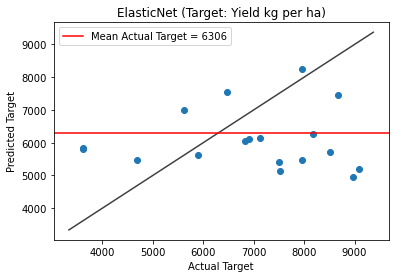

SVR
MAE on test data: 1911.7091493705511
RMSE on test data: 2259.529138451701
R squared on test data: -0.8811534179110576
MAPE on test data: 28.58631474542487


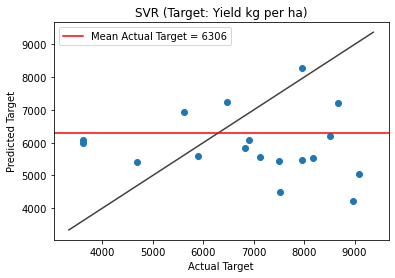

GBR
MAE on test data: 1461.204441148853
RMSE on test data: 1929.902349548438
R squared on test data: -0.3723313768514336
MAPE on test data: 19.15447512280823


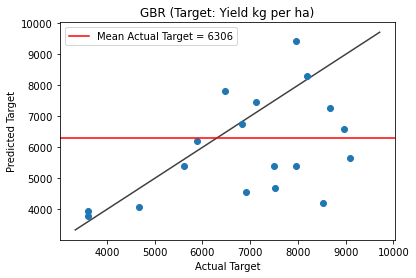

XGBoost
MAE on test data: 1214.2069598786682
RMSE on test data: 1607.120799300112
R squared on test data: 0.04833221782310504
MAPE on test data: 15.980041919689846


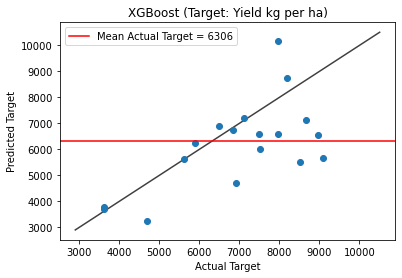

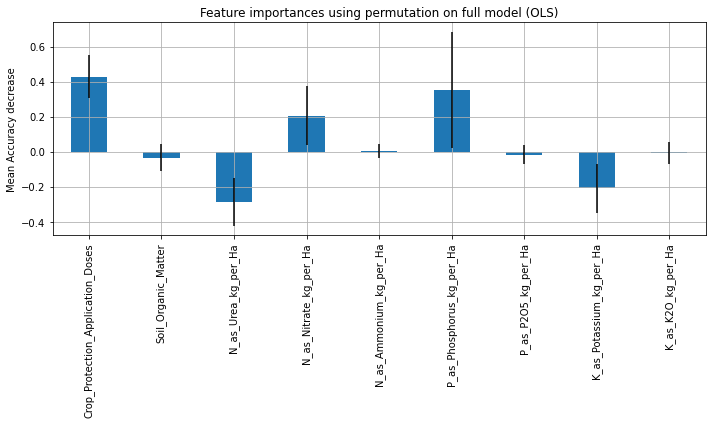

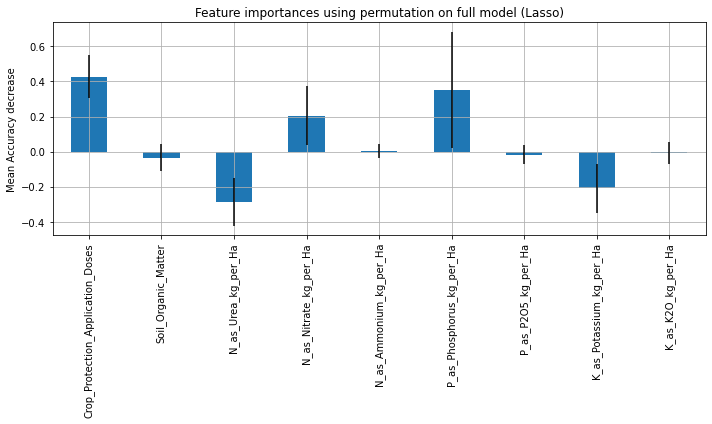

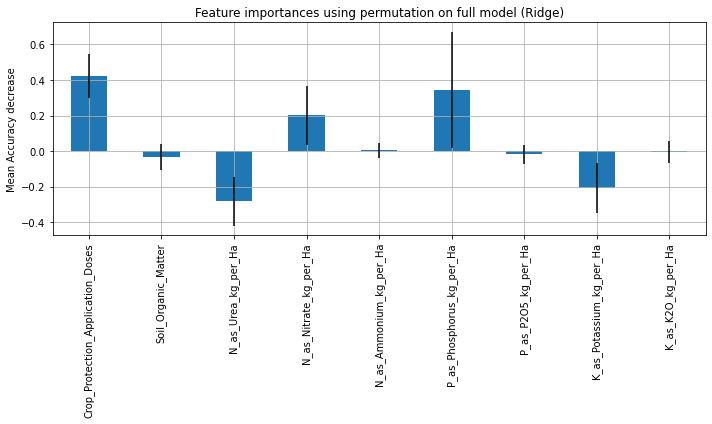

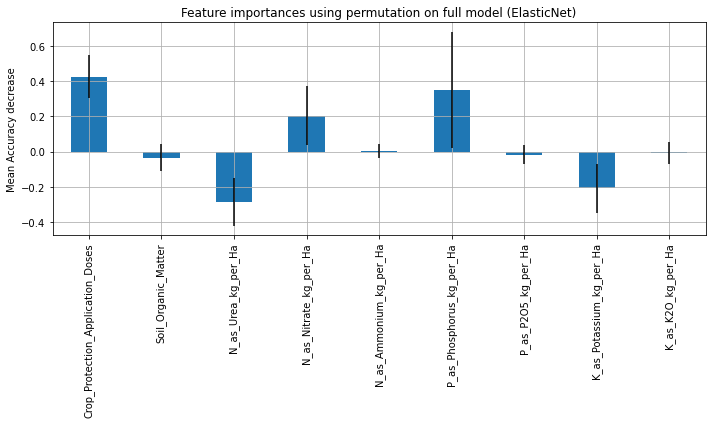

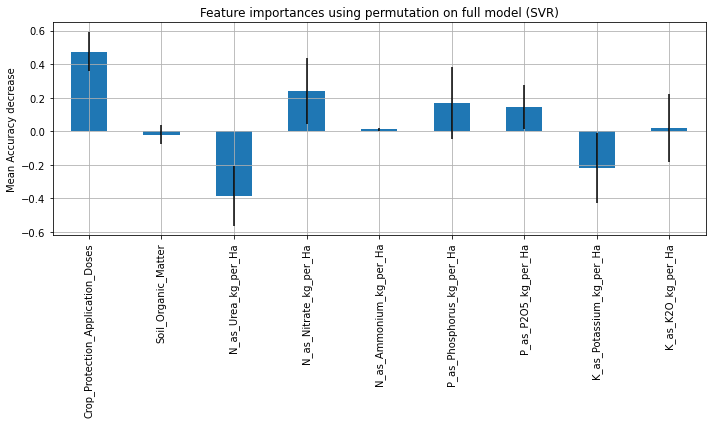

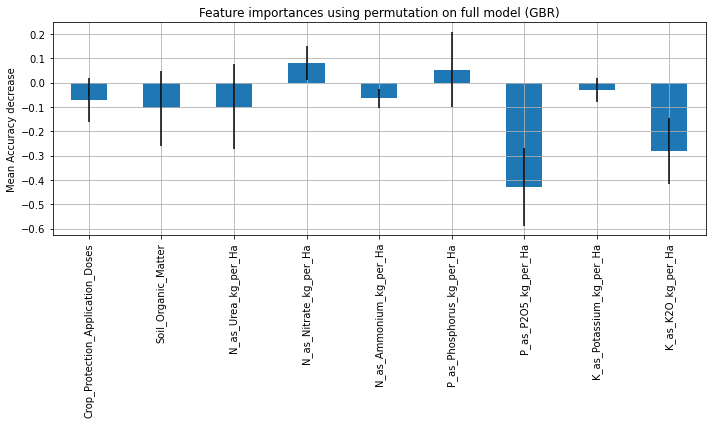

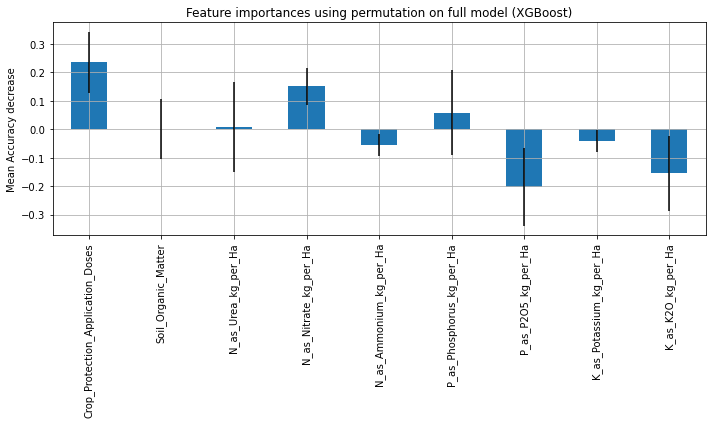

In [7]:
#Winter
#Soil_Organic_Matter Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])
print(display(df_SOM_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Soil_Organic_Matter Winter Results:
#1.XGBoost Cluster 0 had good prediction

In [ ]:
#Summer, elements combined (SOM)

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                 14.0                 3.69      7586.243386   
1                                 20.0                 3.38      7204.924242   
2                                 15.0                 3.32     11586.428571   
3                                 13.0                 4.50      8476.666667   
4                                 23.0                 4.50      6534.500000   
..                                 ...                  ...              ...   
124                               10.0                 3.50      8383.939394   
125                                8.0                 3.60      7419.192547   
126                               15.0                 5.38     11044.670659   
127                               13.0                 5.38     10502.634731   
128                               15.0                 3.75      6746.722689   

     N_total_kg_per_ha  P_total_kg_per_ha  K_total_kg_per_ha  
0                170.2                0.0                0.0  
1                179.4                0.0               90.0  
2                 23.0               75.9                0.0  
3                201.6               83.2              120.0  
4                114.0              104.0              120.0  
..                 ...                ...                ...  
124              186.3                0.0              100.2  
125               62.1                0.0              181.2  
126              153.0              114.4               78.0  
127              153.0              114.4               81.0  
128              153.0              114.4               81.0  

[129 rows x 6 columns]

None


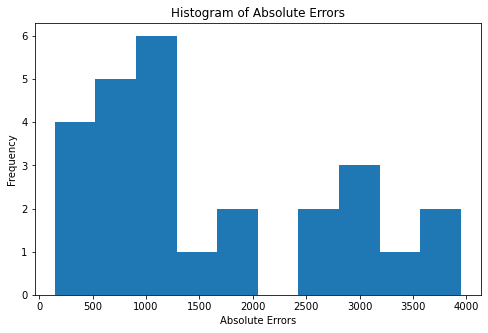

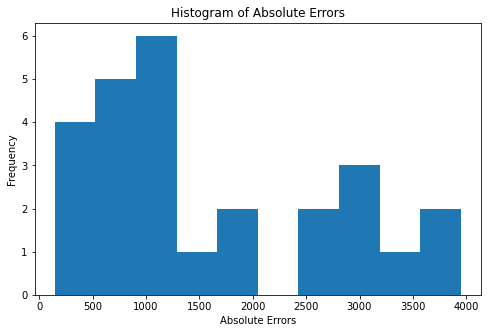

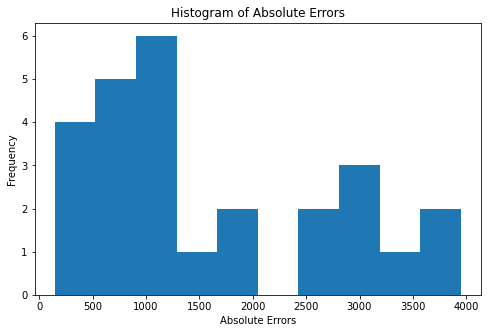

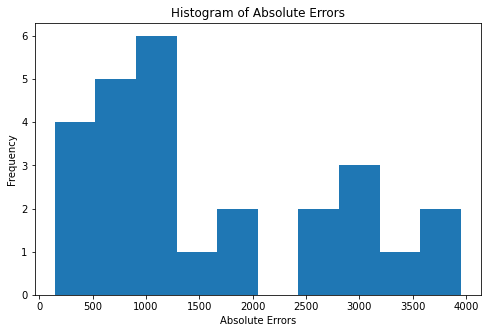

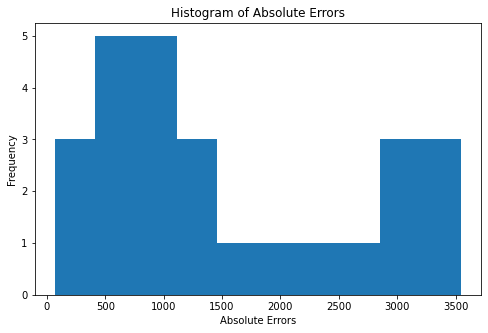

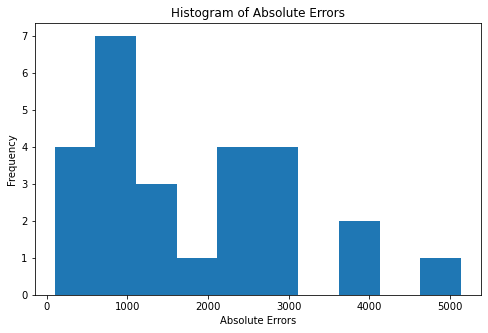

[19:50:17] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


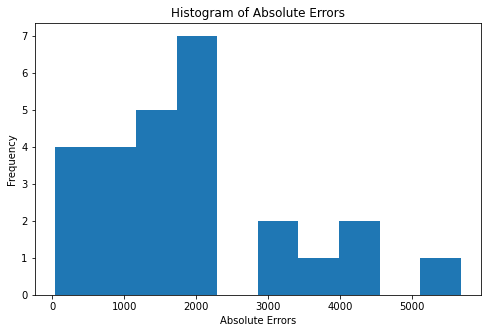

OLS
MAE on test data: 1614.1508628478675
RMSE on test data: 1977.824124797132
R squared on test data: -0.031519564334134165
MAPE on test data: 19.699428043225325


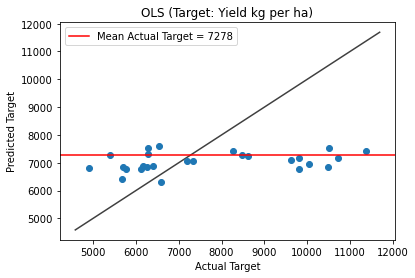

Lasso
MAE on test data: 1614.2247832865428
RMSE on test data: 1977.9059815901528
R squared on test data: -0.03160494971266514
MAPE on test data: 19.7003612706415


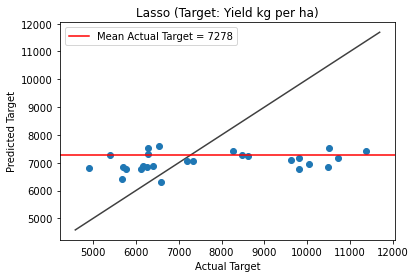

Ridge
MAE on test data: 1614.3322824153063
RMSE on test data: 1977.9866876575898
R squared on test data: -0.031689138221129065
MAPE on test data: 19.702205322102767


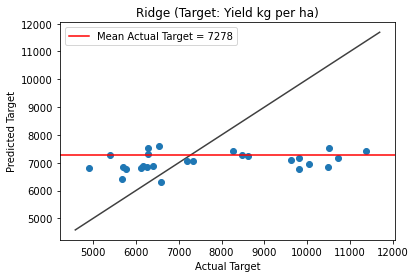

ElasticNet
MAE on test data: 1614.2710365896287
RMSE on test data: 1977.957037583329
R squared on test data: -0.031658208356450945
MAPE on test data: 19.700947568369116


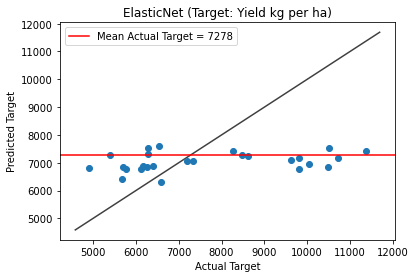

SVR
MAE on test data: 1555.2858766009851
RMSE on test data: 1906.7346017058367
R squared on test data: 0.04130022559415969
MAPE on test data: 19.156839795115797


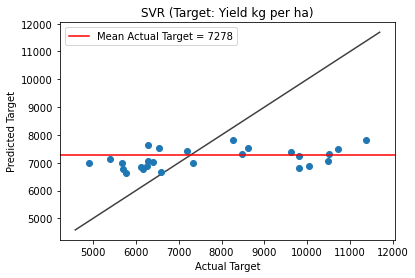

GBR
MAE on test data: 1808.5303216122984
RMSE on test data: 2188.4349875756343
R squared on test data: -0.2629013526352477
MAPE on test data: 22.97160877837536


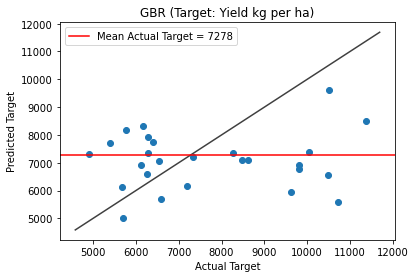

XGBoost
MAE on test data: 1893.2430953233415
RMSE on test data: 2342.7868320408547
R squared on test data: -0.44733038007062653
MAPE on test data: 23.547963239803277


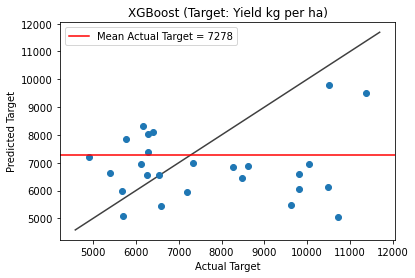

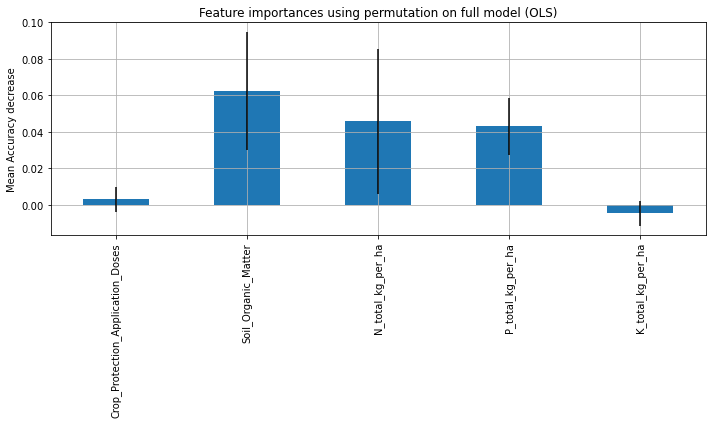

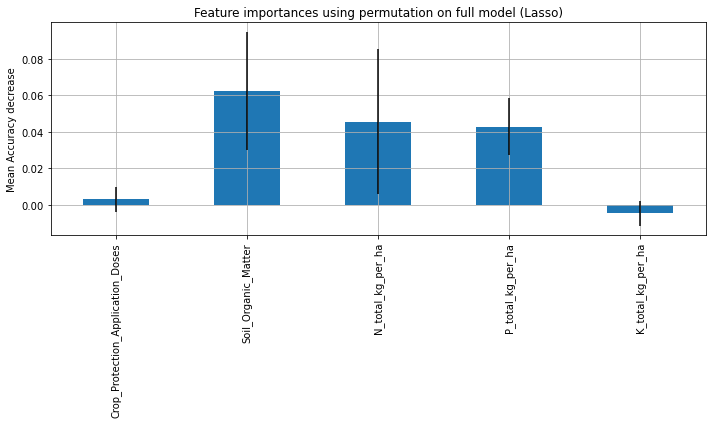

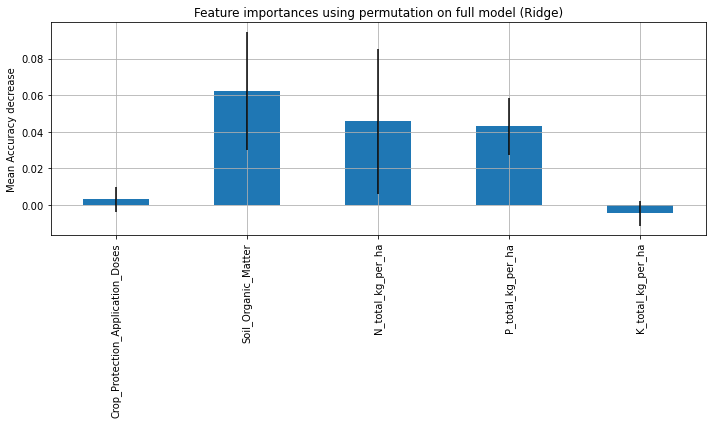

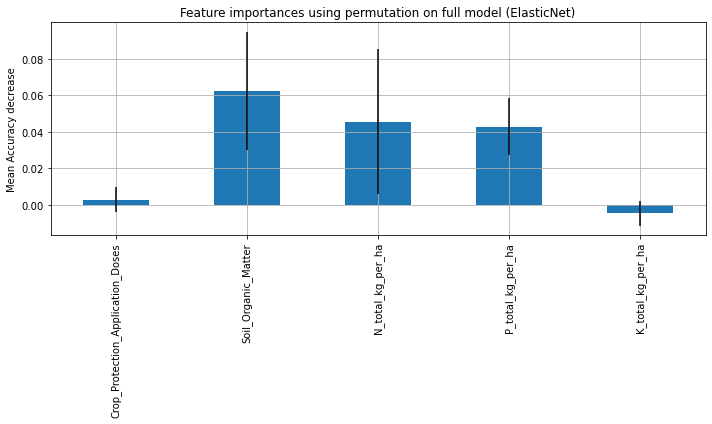

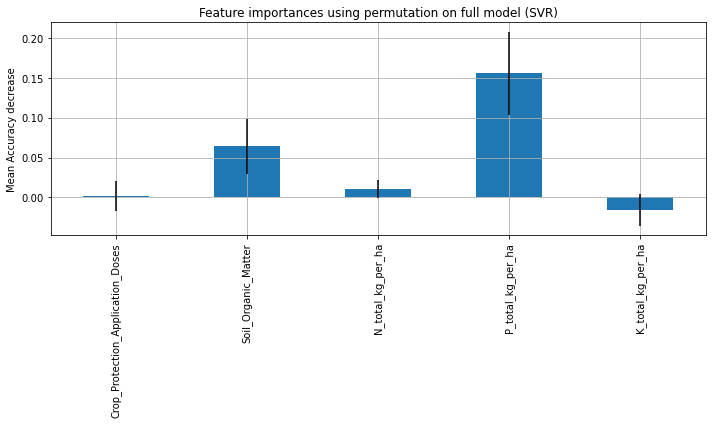

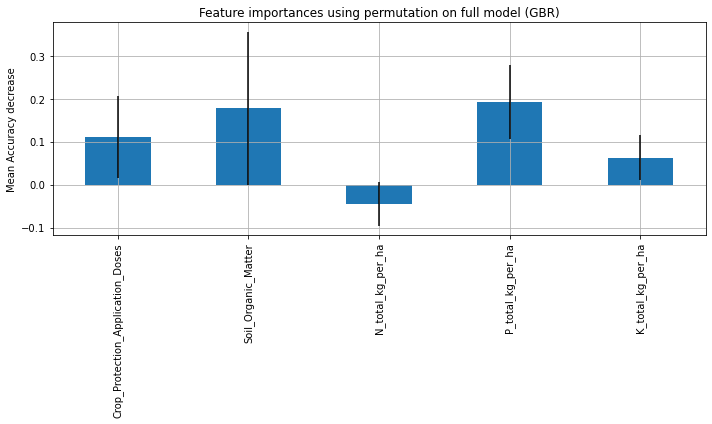

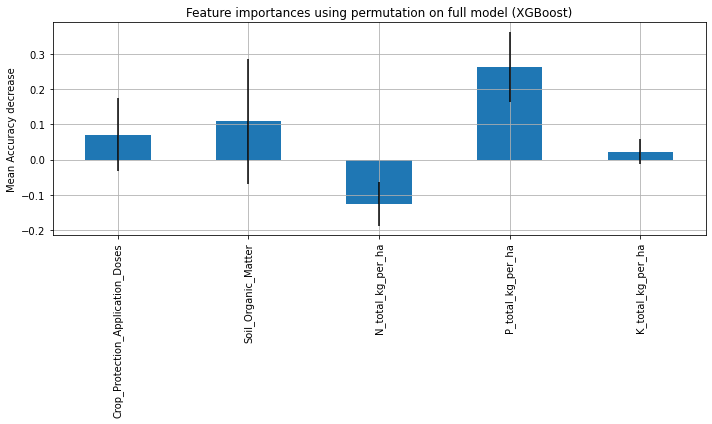

In [8]:
#Summer
#Soil_Organic_Matter Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_combined_elements.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])
print(display(df_SOM_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                 14.0                 3.69      7586.243386   
1                                 20.0                 3.38      7204.924242   
2                                 15.0                 3.32     11586.428571   
3                                 13.0                 4.50      8476.666667   
4                                 23.0                 4.50      6534.500000   
..                                 ...                  ...              ...   
124                               10.0                 3.50      8383.939394   
125                                8.0                 3.60      7419.192547   
126                               15.0                 5.38     11044.670659   
127                               13.0                 5.38     10502.634731   
128                               15.0                 3.75      6746.722689   

     N_total_kg_per_ha  P_total_kg_per_ha  K_total_kg_per_ha  
0                170.2                0.0                0.0  
1                179.4                0.0               90.0  
2                 23.0               75.9                0.0  
3                201.6               83.2              120.0  
4                114.0              104.0              120.0  
..                 ...                ...                ...  
124              186.3                0.0              100.2  
125               62.1                0.0              181.2  
126              153.0              114.4               78.0  
127              153.0              114.4               81.0  
128              153.0              114.4               81.0  

[129 rows x 6 columns]

None


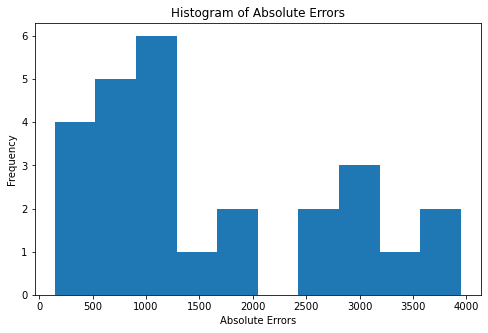

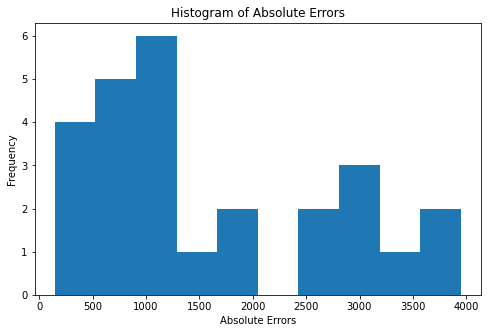

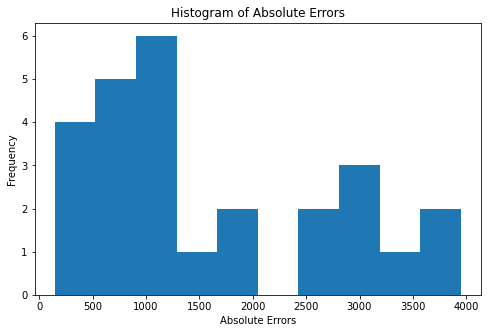

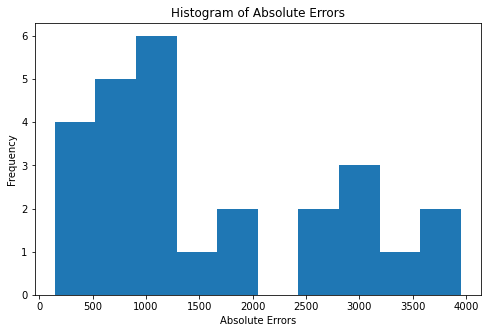

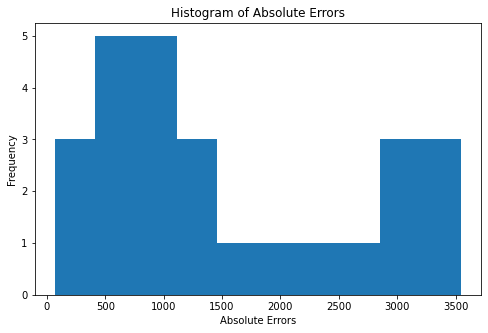

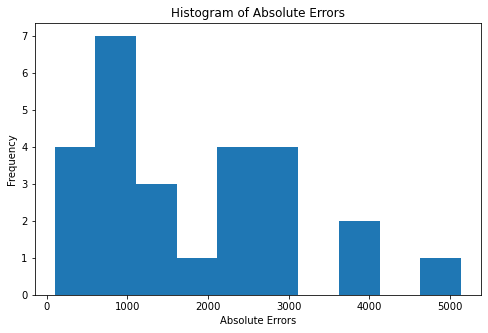

[19:51:05] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


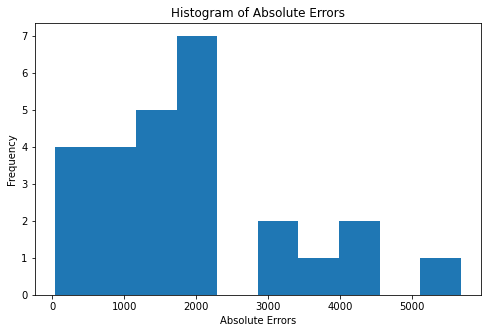

OLS
MAE on test data: 1614.1508628478675
RMSE on test data: 1977.824124797132
R squared on test data: -0.031519564334134165
MAPE on test data: 19.699428043225325


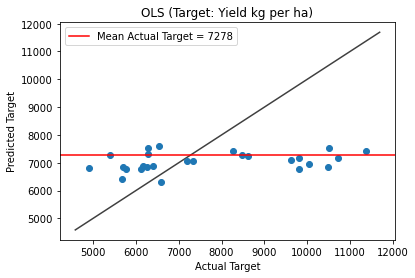

Lasso
MAE on test data: 1614.2247832865428
RMSE on test data: 1977.9059815901528
R squared on test data: -0.03160494971266514
MAPE on test data: 19.7003612706415


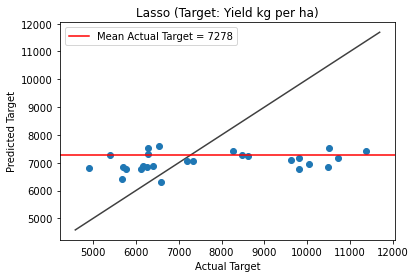

Ridge
MAE on test data: 1614.3322824153063
RMSE on test data: 1977.9866876575898
R squared on test data: -0.031689138221129065
MAPE on test data: 19.702205322102767


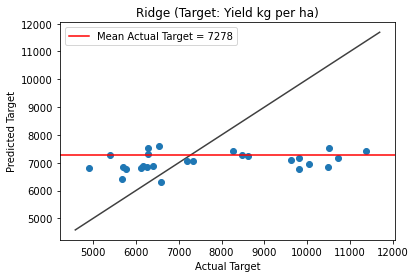

ElasticNet
MAE on test data: 1614.2710365896287
RMSE on test data: 1977.957037583329
R squared on test data: -0.031658208356450945
MAPE on test data: 19.700947568369116


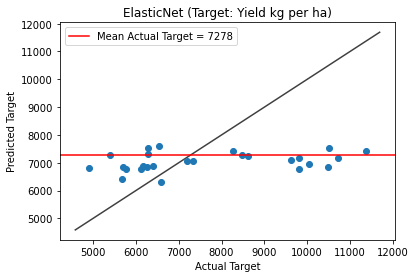

SVR
MAE on test data: 1555.2858766009851
RMSE on test data: 1906.7346017058367
R squared on test data: 0.04130022559415969
MAPE on test data: 19.156839795115797


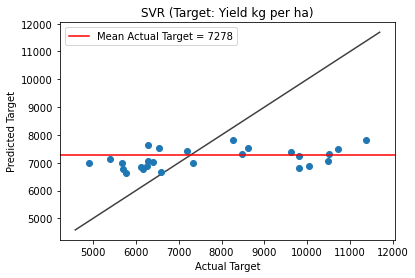

GBR
MAE on test data: 1808.5303216122984
RMSE on test data: 2188.4349875756343
R squared on test data: -0.2629013526352477
MAPE on test data: 22.97160877837536


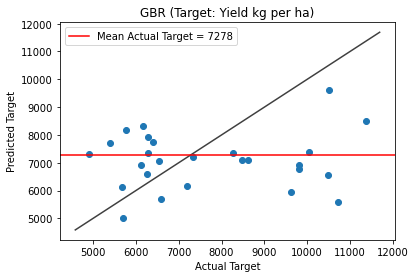

XGBoost
MAE on test data: 1893.2430953233415
RMSE on test data: 2342.7868320408547
R squared on test data: -0.44733038007062653
MAPE on test data: 23.547963239803277


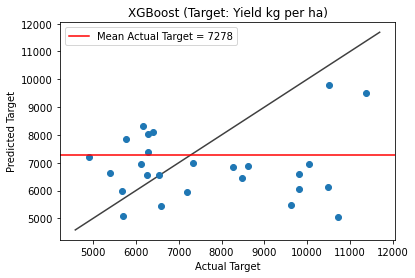

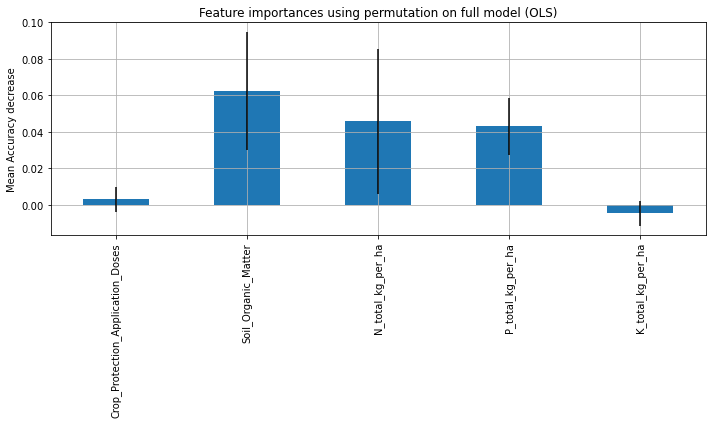

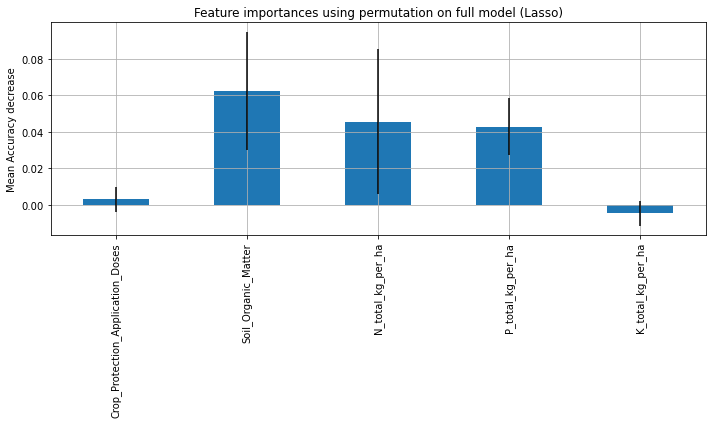

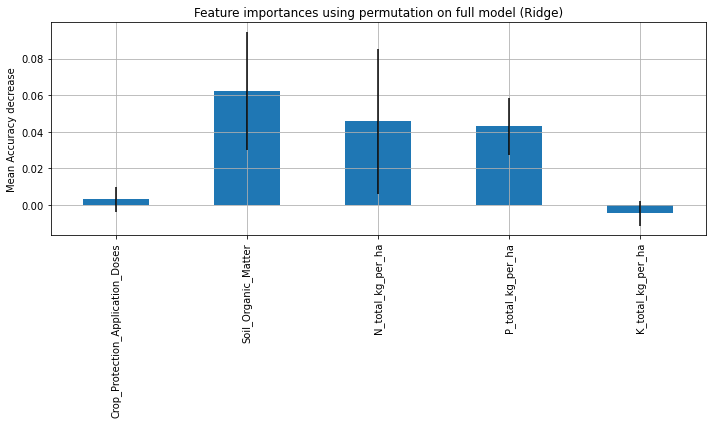

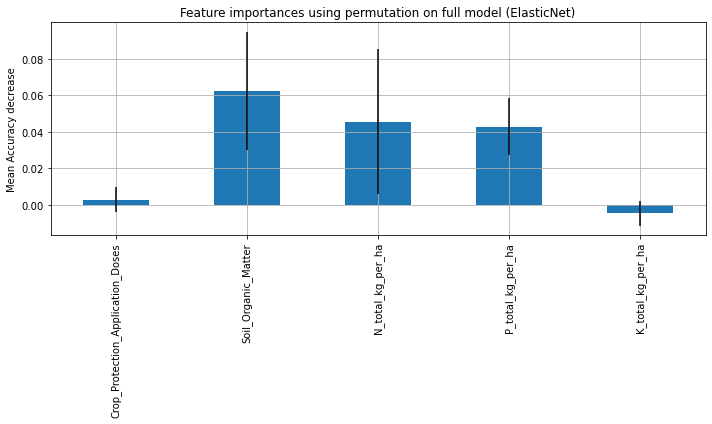

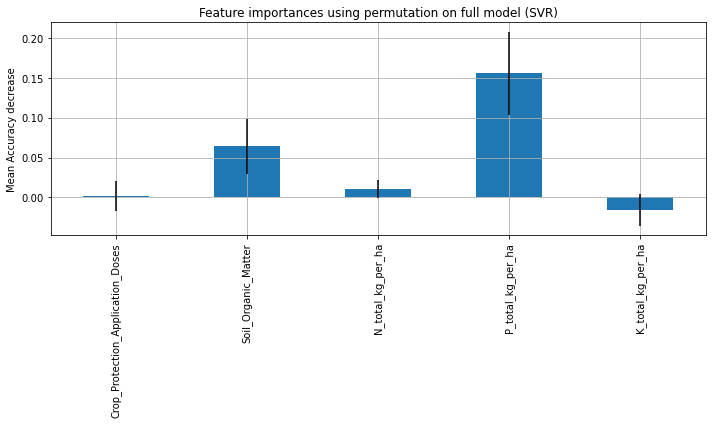

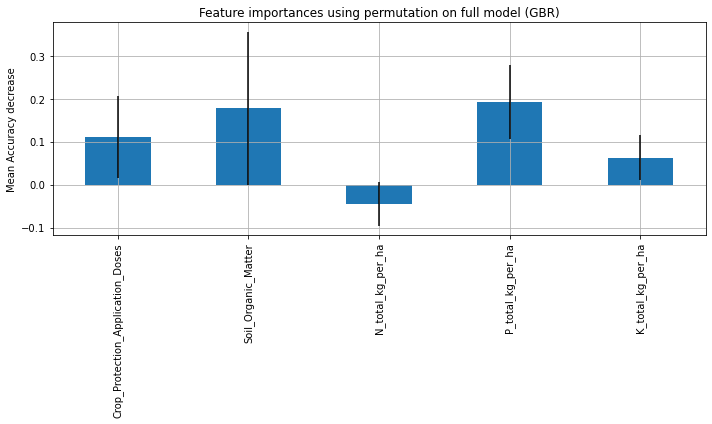

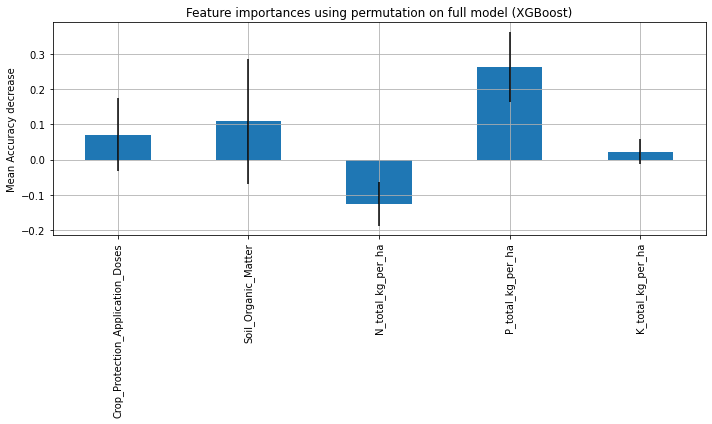

In [9]:
#Summer
#Soil_Organic_Matter Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_combined_elements.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])
print(display(df_SOM_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Soil_Organic_Matter Summer Combined Elements Results:
#1.No good prediction

In [ ]:
#Winter Elements Combined
#Soil_Organic_Matter Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_combined_elements.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])
print(display(df_SOM_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
### Winter Elements Combined
#Soil_Organic_Matter Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_combined_elements.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])
print(display(df_SOM_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Soil_Organic_Matter Winter Combined Elements Results:
#1.XGBoost Cluster 0 had good prediction

In [ ]:
#Outlier Removal Summer, Parent Compounds

In [ ]:
#Summer
#Soil_Organic_Matter Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

df_SOM_cluster_0 = df_SOM_cluster_0[(df_SOM_cluster_0['Yield_kg_per_Ha'] > df_SOM_cluster_0['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_SOM_cluster_0['Yield_kg_per_Ha'] < df_SOM_cluster_0['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df_SOM_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Summer
#Soil_Organic_Matter Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

df_SOM_cluster_1 = df_SOM_cluster_1[(df_SOM_cluster_1['Yield_kg_per_Ha'] > df_SOM_cluster_1['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_SOM_cluster_1['Yield_kg_per_Ha'] < df_SOM_cluster_1['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df_SOM_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Soil_Organic_Matter Summer Parent Compound, Outliers Removed Results:
#1.No good prediction

In [ ]:
#Outlier Removal Winter, Parent Compounds

In [ ]:
#Winter
#Soil_Organic_Matter Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])\

df_SOM_cluster_0 = df_SOM_cluster_0[(df_SOM_cluster_0['Yield_kg_per_Ha'] > df_SOM_cluster_0['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_SOM_cluster_0['Yield_kg_per_Ha'] < df_SOM_cluster_0['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df_SOM_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Winter
#Soil_Organic_Matter Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

df_SOM_cluster_1 = df_SOM_cluster_1[(df_SOM_cluster_1['Yield_kg_per_Ha'] > df_SOM_cluster_1['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_SOM_cluster_1['Yield_kg_per_Ha'] < df_SOM_cluster_1['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df_SOM_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Soil_Organic_Matter Winter Parent Compound, Outliers Removed Results:
#1.No good prediction

In [ ]:
#Outlier Removal Summer, Elements Combined

In [ ]:
#Summer
#Soil_Organic_Matter Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_combined_elements.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

df_SOM_cluster_0 = df_SOM_cluster_0[(df_SOM_cluster_0['Yield_kg_per_Ha'] > df_SOM_cluster_0['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_SOM_cluster_0['Yield_kg_per_Ha'] < df_SOM_cluster_0['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df_SOM_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Summer
#Soil_Organic_Matter Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_combined_elements.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

df_SOM_cluster_1 = df_SOM_cluster_1[(df_SOM_cluster_1['Yield_kg_per_Ha'] > df_SOM_cluster_1['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_SOM_cluster_1['Yield_kg_per_Ha'] < df_SOM_cluster_1['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df_SOM_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Soil_Organic_Matter Summer Parent Compound, Outliers Removed Results:
#1.No good prediction

In [ ]:
#Outlier Removal Winter, Elements Combined

In [ ]:
#Winter
#Soil_Organic_Matter Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

df_SOM_cluster_0 = df_SOM_cluster_0[(df_SOM_cluster_0['Yield_kg_per_Ha'] > df_SOM_cluster_0['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_SOM_cluster_0['Yield_kg_per_Ha'] < df_SOM_cluster_0['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df_SOM_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Winter
#Soil_Organic_Matter Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

df_SOM_cluster_1 = df_SOM_cluster_1[(df_SOM_cluster_1['Yield_kg_per_Ha'] > df_SOM_cluster_1['Yield_kg_per_Ha'].quantile(.05)) \
                                                               & (df_SOM_cluster_1['Yield_kg_per_Ha'] < df_SOM_cluster_1['Yield_kg_per_Ha'].quantile(.95))].reset_index(drop = True)

print(display(df_SOM_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1, test_size = 0.2, random_state = 60)

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Soil_Organic_Matter Winter Parent Compound, Outliers Removed Results:
#1.No good prediction

In [ ]:
#Number of Fertilizer Applications Scatterplots and Subset

In [ ]:
#Fertilizer applications vs. Yield, summer and winter

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')

plt.figure(figsize=(5,5))
plt.scatter(df['Crop_Protection_Application_Doses'], df['Yield_kg_per_Ha'])
plt.xlabel('Crop Protection Application Doses')
plt.ylabel('Yield (kg per ha)')
plt.title('Crop Protection vs. Yield (Summer)')
plt.show()

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')

plt.figure(figsize=(5,5))
plt.scatter(df['Crop_Protection_Application_Doses'], df['Yield_kg_per_Ha'])
plt.xlabel('Crop Protection Application Doses')
plt.ylabel('Yield (kg per ha)')
plt.title('Crop Protection vs. Yield (Winter)')
#Fertilizer applications vs. Yield (Summer, SOM Cluster 0 and 1)plt.show()

In [ ]:
#Fertilizer applications vs. Yield (Summer, SOM Cluster 0 and 1)

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

plt.figure(figsize=(5,5))
plt.scatter(df_SOM_cluster_0['Crop_Protection_Application_Doses'], df_SOM_cluster_0['Yield_kg_per_Ha'])
plt.xlabel('Crop Protection Application Doses')
plt.ylabel('Yield (kg per ha)')
plt.title('Crop Protection vs. Yield (SOM Cluster 0, Summer)')
plt.show()

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

plt.figure(figsize=(5,5))
plt.scatter(df_SOM_cluster_1['Crop_Protection_Application_Doses'], df_SOM_cluster_1['Yield_kg_per_Ha'])
plt.xlabel('Crop Protection Application Doses')
plt.ylabel('Yield (kg per ha)')
plt.title('Crop Protection vs. Yield (SOM Cluster 1, Summer)')
plt.show()

In [ ]:
#Fertilizer applications vs. Yield (Winter, SOM Cluster 0 and 1)

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

plt.figure(figsize=(5,5))
plt.scatter(df_SOM_cluster_0['Crop_Protection_Application_Doses'], df_SOM_cluster_0['Yield_kg_per_Ha'])
plt.xlabel('Crop Protection Application Doses')
plt.ylabel('Yield (kg per ha)')
plt.title('Crop Protection vs. Yield (SOM Cluster 0, Winter)')
plt.show()

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

plt.figure(figsize=(5,5))
plt.scatter(df_SOM_cluster_1['Crop_Protection_Application_Doses'], df_SOM_cluster_1['Yield_kg_per_Ha'])
plt.xlabel('Crop Protection Application Doses')
plt.ylabel('Yield (kg per ha)')
plt.title('Crop Protection vs. Yield (SOM Cluster 1, Winter)')
plt.show()

In [ ]:
#Summer
#Elbow method Crop Protection

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
df = df.drop(columns = ['CO2_kg_per_Ha'])

sum_of_squared_distances = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df['Crop_Protection_Application_Doses'].values.reshape(-1,1))
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1,11), sum_of_squared_distances, 'bx-')
plt.xlabel('Num Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                 20.0             3.380000      7204.924242   
1                                 25.0             2.316250      6964.509804   
2                                 20.0             2.500000      5388.190476   
3                                 21.0             1.900000      2272.068966   
4                                 20.0             2.680000      9017.383670   
..                                 ...                  ...              ...   
164                               19.0             3.671951      8920.879121   
165                               25.0             3.342500      9819.166667   
166                               27.0             3.248855      7313.593750   
167                               22.0             3.479710      9149.154930   
168                               20.0             2.860000      9145.333333   

     N_as_Urea_kg_per_Ha  N_as_Nitrate_kg_per_Ha  N_as_Ammonium_kg_per_Ha  \
0                 179.40                    0.00                   0.0000   
1                 187.68                    0.00                  24.2000   
2                  92.00                    0.00                  52.8300   
3                  92.00                    0.00                  52.5000   
4                 147.20                   24.48                   1.1000   
..                   ...                     ...                      ...   
164               184.00                    0.00                  26.2900   
165               184.00                    0.00                  25.9600   
166               184.00                    0.00                  26.6200   
167               184.00                    0.00                  27.9125   
168               128.80                    0.00                  24.7500   

     P_as_Phosphorus_kg_per_Ha  P_as_P2O5_kg_per_Ha  K_as_Potassium_kg_per_Ha  \
0                         0.00                 0.00                       0.0   
1                         0.00               114.40                       0.0   
2                         0.00                 1.56                       0.0   
3                         0.00                 0.00                       0.0   
4                       119.68                 5.20                       0.0   
..                         ...                  ...                       ...   
164                       0.00               124.28                       0.0   
165                       0.00               122.72                       0.0   
166                       0.00               125.84                       0.0   
167                       0.00               131.95                       0.0   
168                       0.00               117.00                       0.0   

     K_as_K2O_kg_per_Ha  
0                  90.0  
1                 120.0  
2                  90.0  
3                  90.0  
4                 139.8  
..                  ...  
164               102.0  
165               102.0  
166               102.0  
167               108.0  
168                84.0  

[169 rows x 10 columns]

None


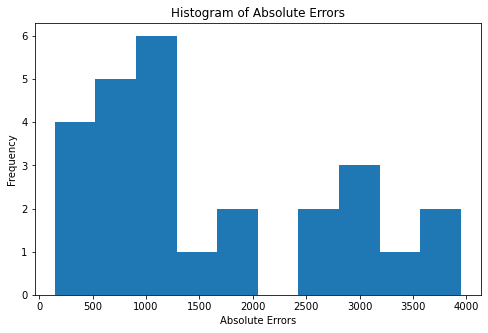

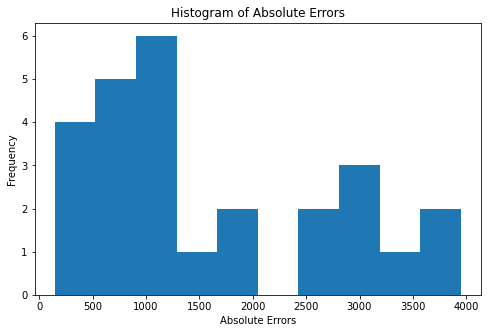

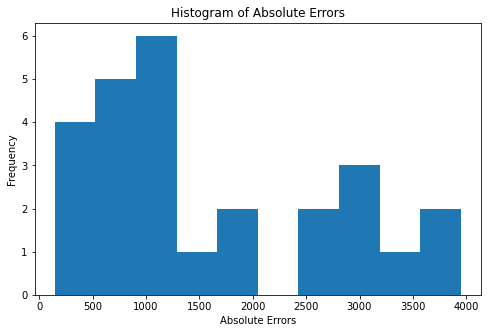

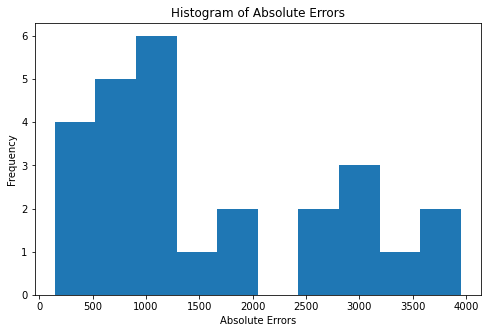

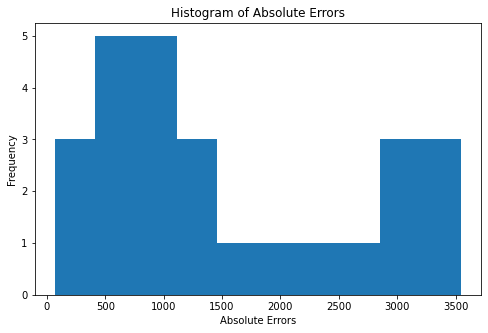

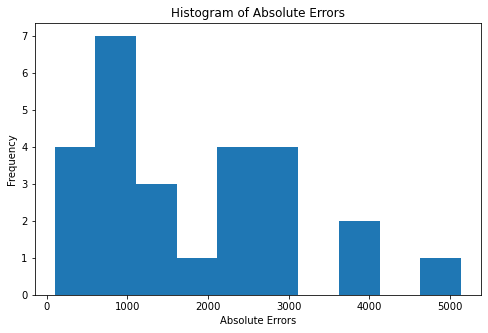

[19:51:54] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


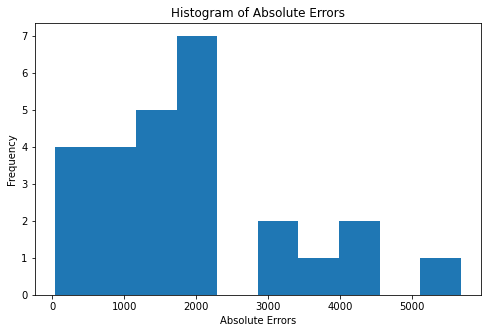

OLS
MAE on test data: 1614.1508628478675
RMSE on test data: 1977.824124797132
R squared on test data: -0.031519564334134165
MAPE on test data: 19.699428043225325


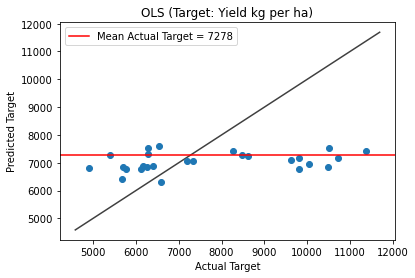

Lasso
MAE on test data: 1614.2247832865428
RMSE on test data: 1977.9059815901528
R squared on test data: -0.03160494971266514
MAPE on test data: 19.7003612706415


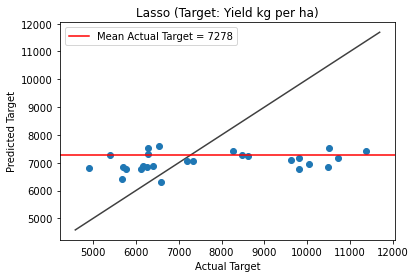

Ridge
MAE on test data: 1614.3322824153063
RMSE on test data: 1977.9866876575898
R squared on test data: -0.031689138221129065
MAPE on test data: 19.702205322102767


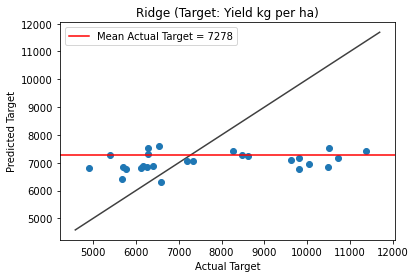

ElasticNet
MAE on test data: 1614.2710365896287
RMSE on test data: 1977.957037583329
R squared on test data: -0.031658208356450945
MAPE on test data: 19.700947568369116


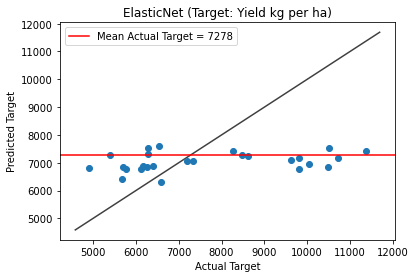

SVR
MAE on test data: 1555.2858766009851
RMSE on test data: 1906.7346017058367
R squared on test data: 0.04130022559415969
MAPE on test data: 19.156839795115797


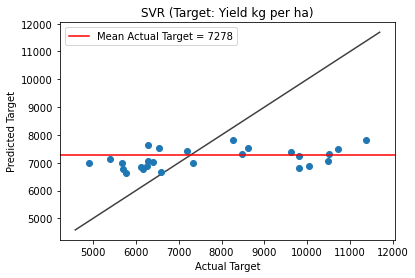

GBR
MAE on test data: 1808.5303216122984
RMSE on test data: 2188.4349875756343
R squared on test data: -0.2629013526352477
MAPE on test data: 22.97160877837536


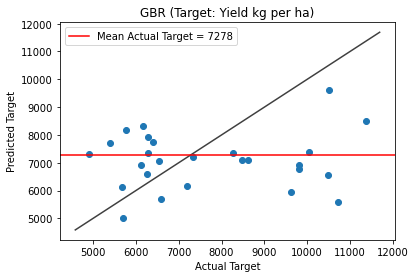

XGBoost
MAE on test data: 1893.2430953233415
RMSE on test data: 2342.7868320408547
R squared on test data: -0.44733038007062653
MAPE on test data: 23.547963239803277


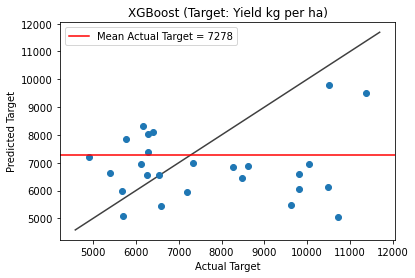

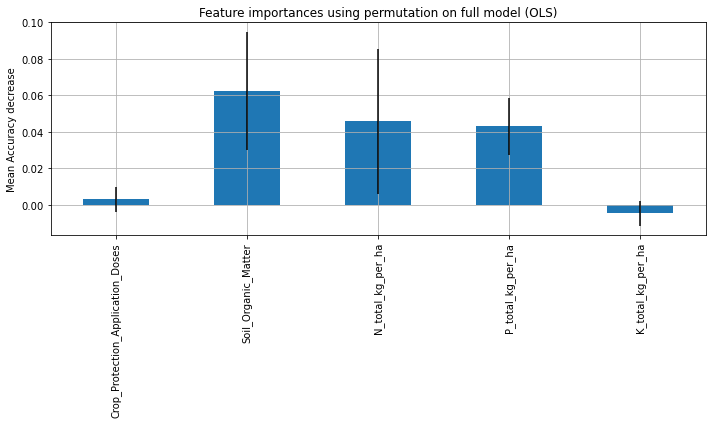

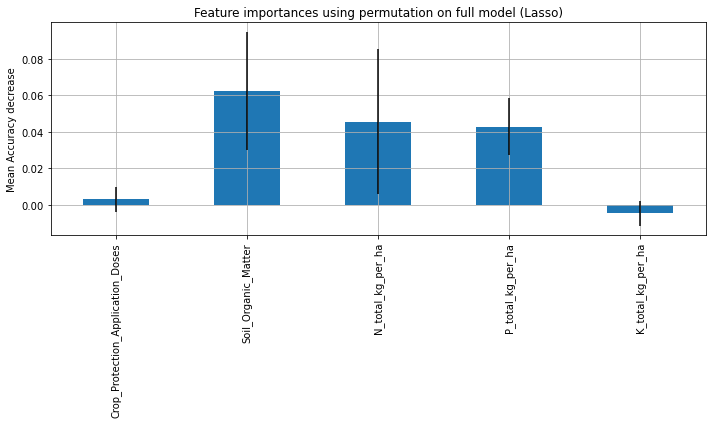

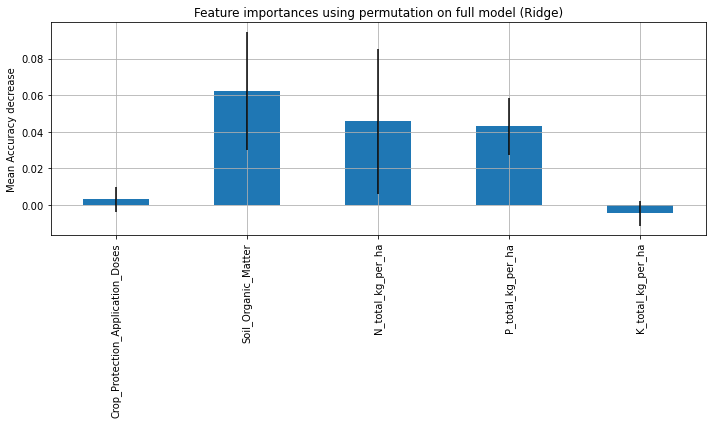

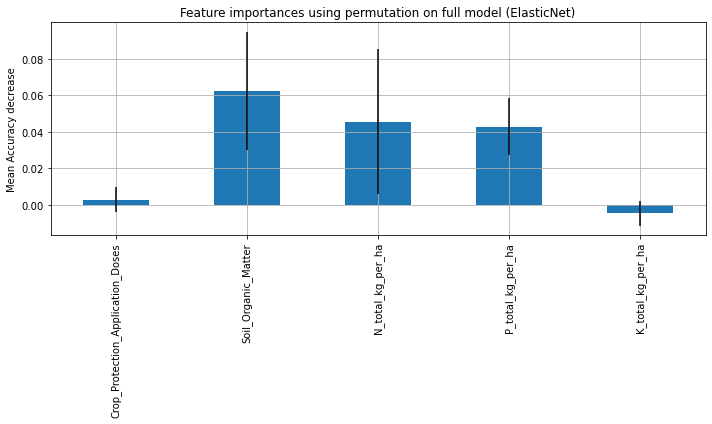

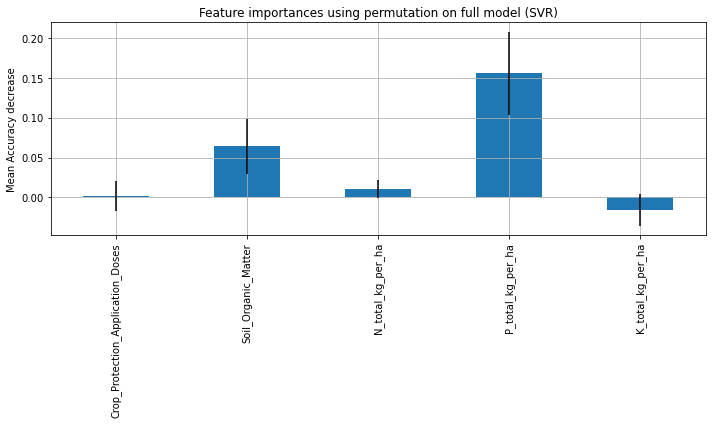

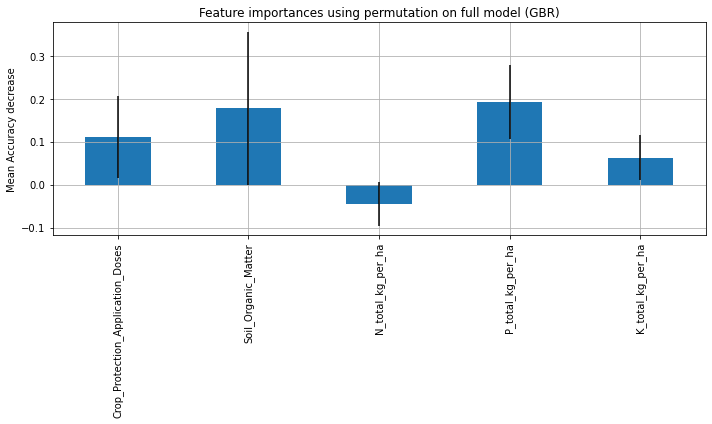

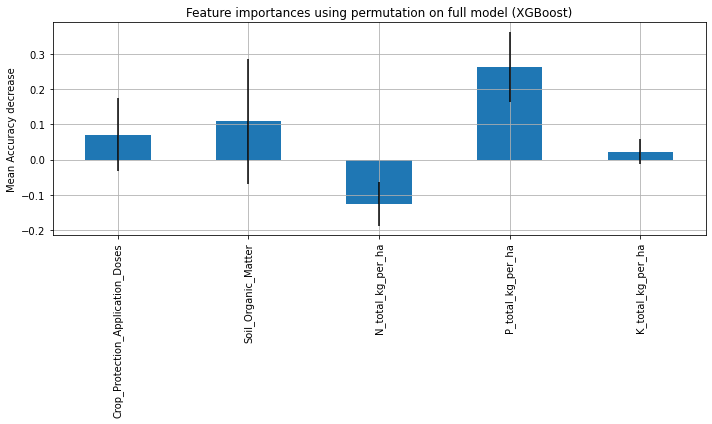

In [10]:
#Summer
#Crop Protection Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_crop_protection_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_crop_protection_cluster_0 = df_crop_protection_cluster_0.drop(columns = ['cluster'])

print(display(df_crop_protection_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                 20.0             3.380000      7204.924242   
1                                 25.0             2.316250      6964.509804   
2                                 20.0             2.500000      5388.190476   
3                                 21.0             1.900000      2272.068966   
4                                 20.0             2.680000      9017.383670   
..                                 ...                  ...              ...   
164                               19.0             3.671951      8920.879121   
165                               25.0             3.342500      9819.166667   
166                               27.0             3.248855      7313.593750   
167                               22.0             3.479710      9149.154930   
168                               20.0             2.860000      9145.333333   

     N_as_Urea_kg_per_Ha  N_as_Nitrate_kg_per_Ha  N_as_Ammonium_kg_per_Ha  \
0                 179.40                    0.00                   0.0000   
1                 187.68                    0.00                  24.2000   
2                  92.00                    0.00                  52.8300   
3                  92.00                    0.00                  52.5000   
4                 147.20                   24.48                   1.1000   
..                   ...                     ...                      ...   
164               184.00                    0.00                  26.2900   
165               184.00                    0.00                  25.9600   
166               184.00                    0.00                  26.6200   
167               184.00                    0.00                  27.9125   
168               128.80                    0.00                  24.7500   

     P_as_Phosphorus_kg_per_Ha  P_as_P2O5_kg_per_Ha  K_as_Potassium_kg_per_Ha  \
0                         0.00                 0.00                       0.0   
1                         0.00               114.40                       0.0   
2                         0.00                 1.56                       0.0   
3                         0.00                 0.00                       0.0   
4                       119.68                 5.20                       0.0   
..                         ...                  ...                       ...   
164                       0.00               124.28                       0.0   
165                       0.00               122.72                       0.0   
166                       0.00               125.84                       0.0   
167                       0.00               131.95                       0.0   
168                       0.00               117.00                       0.0   

     K_as_K2O_kg_per_Ha  
0                  90.0  
1                 120.0  
2                  90.0  
3                  90.0  
4                 139.8  
..                  ...  
164               102.0  
165               102.0  
166               102.0  
167               108.0  
168                84.0  

[169 rows x 10 columns]

None


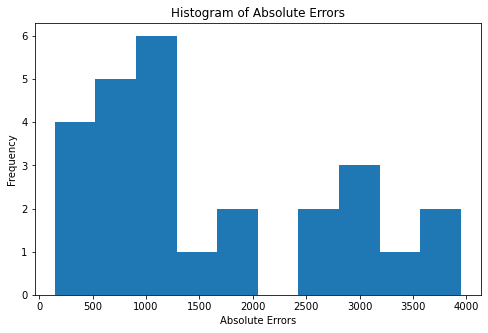

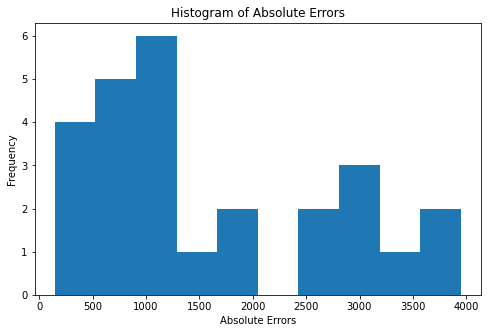

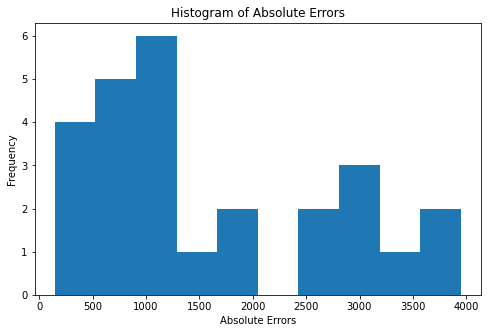

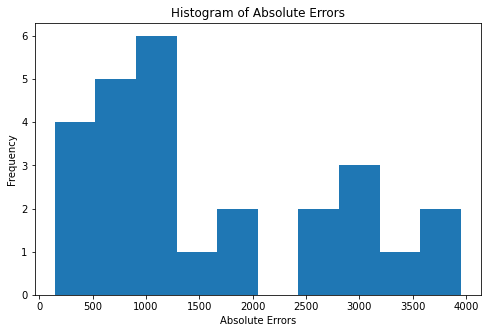

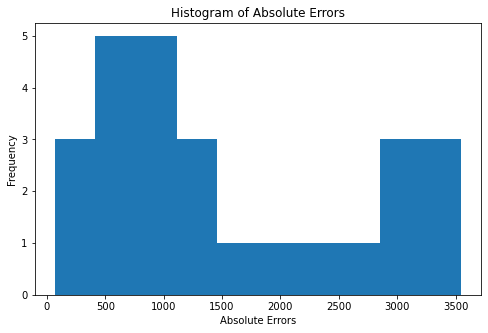

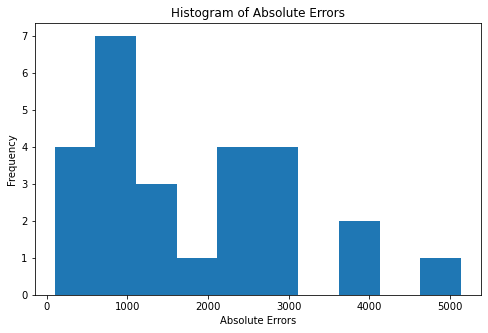

[19:52:41] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


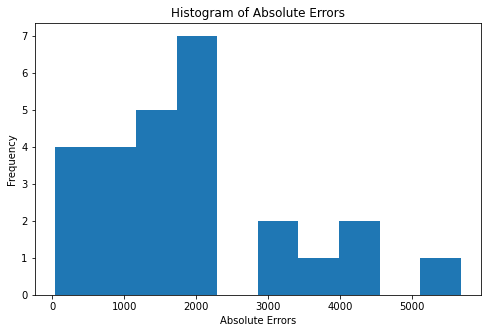

OLS
MAE on test data: 1614.1508628478675
RMSE on test data: 1977.824124797132
R squared on test data: -0.031519564334134165
MAPE on test data: 19.699428043225325


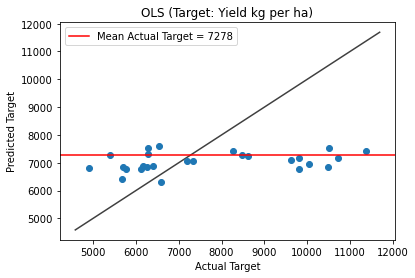

Lasso
MAE on test data: 1614.2247832865428
RMSE on test data: 1977.9059815901528
R squared on test data: -0.03160494971266514
MAPE on test data: 19.7003612706415


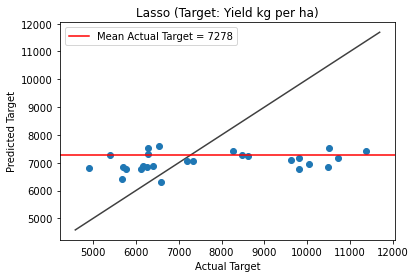

Ridge
MAE on test data: 1614.3322824153063
RMSE on test data: 1977.9866876575898
R squared on test data: -0.031689138221129065
MAPE on test data: 19.702205322102767


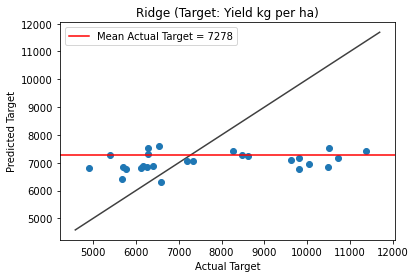

ElasticNet
MAE on test data: 1614.2710365896287
RMSE on test data: 1977.957037583329
R squared on test data: -0.031658208356450945
MAPE on test data: 19.700947568369116


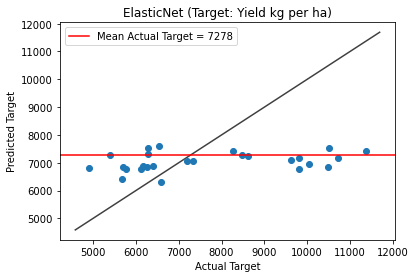

SVR
MAE on test data: 1555.2858766009851
RMSE on test data: 1906.7346017058367
R squared on test data: 0.04130022559415969
MAPE on test data: 19.156839795115797


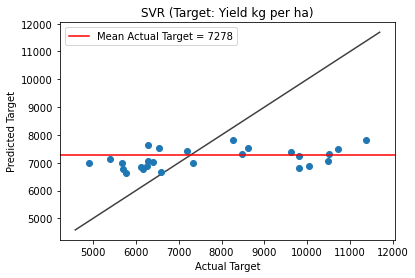

GBR
MAE on test data: 1808.5303216122984
RMSE on test data: 2188.4349875756343
R squared on test data: -0.2629013526352477
MAPE on test data: 22.97160877837536


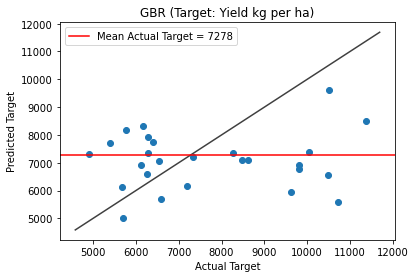

XGBoost
MAE on test data: 1893.2430953233415
RMSE on test data: 2342.7868320408547
R squared on test data: -0.44733038007062653
MAPE on test data: 23.547963239803277


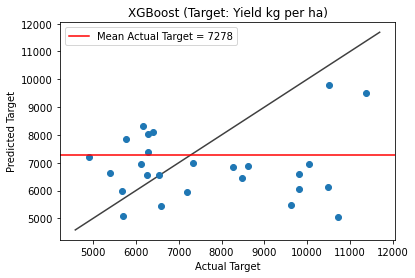

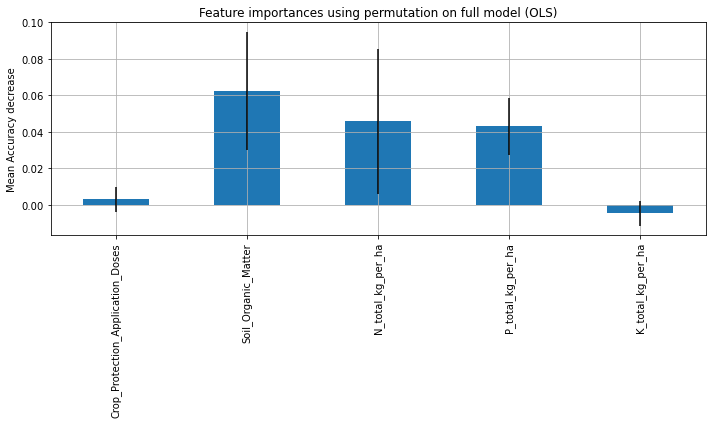

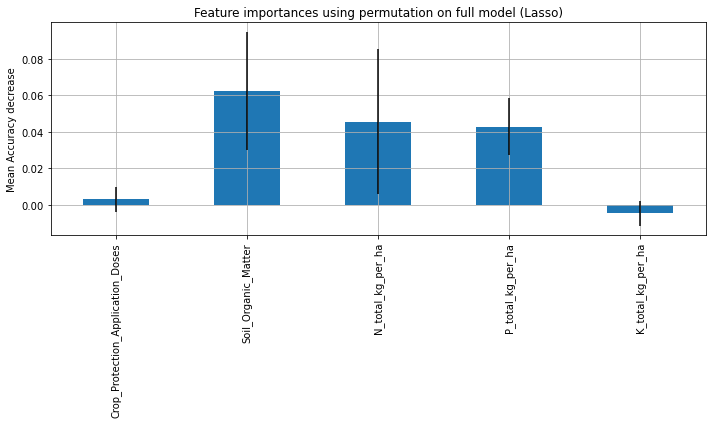

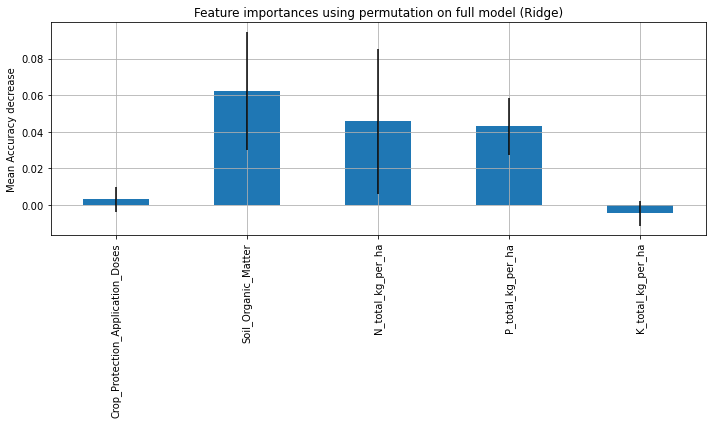

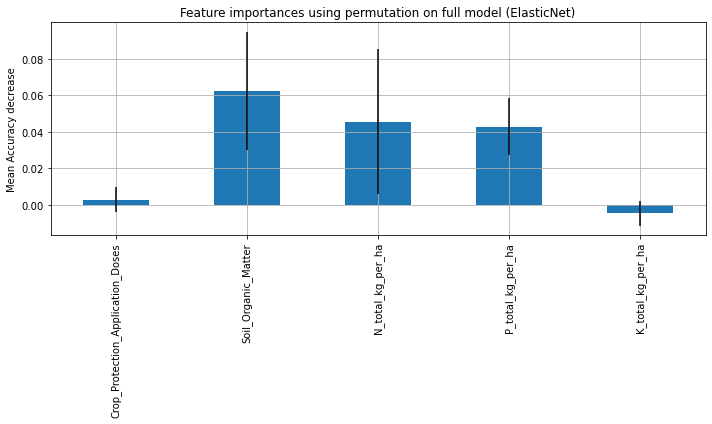

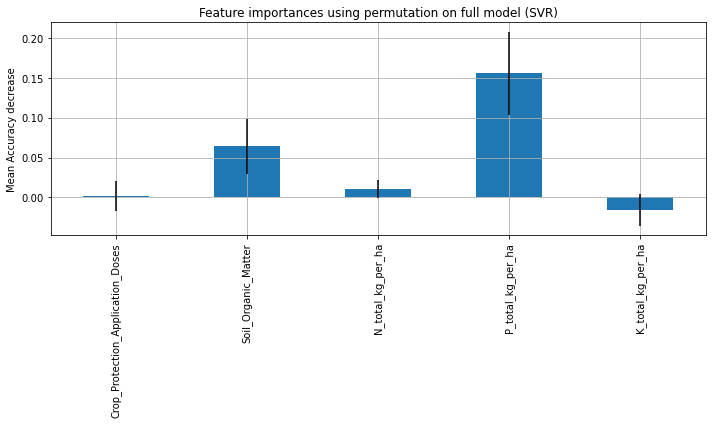

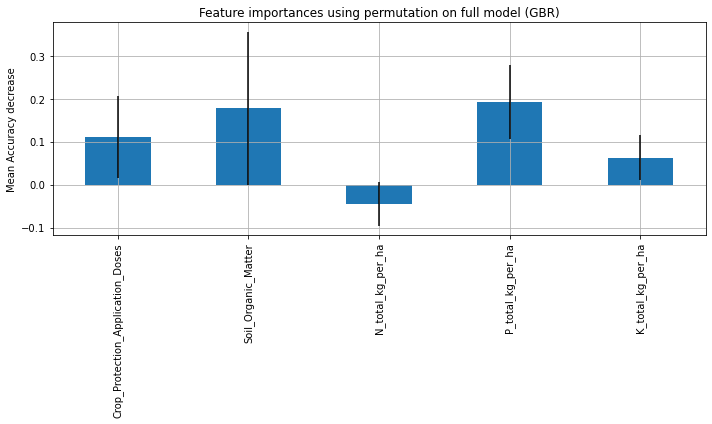

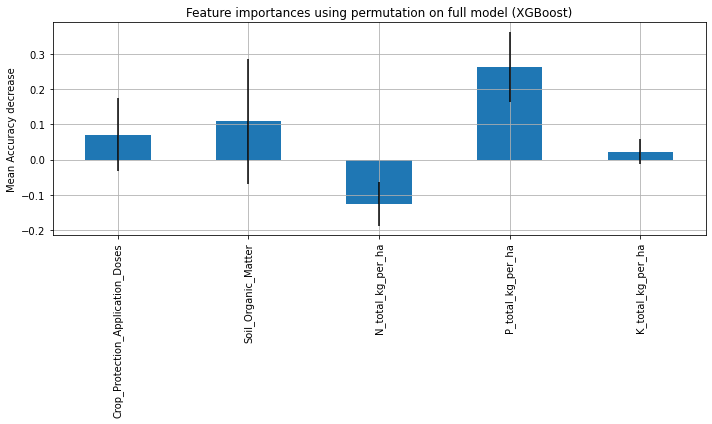

In [11]:
#Summer
#Crop Protection Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_crop_protection_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_crop_protection_cluster_1 = df_crop_protection_cluster_1.drop(columns = ['cluster'])

print(display(df_crop_protection_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Crop Protection Summer Parent Compound:
#1.XGBoost good prediction

In [ ]:
#Winter
#Elbow method Crop Protection

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
df = df.drop(columns = ['CO2_kg_per_Ha'])

sum_of_squared_distances = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df['Crop_Protection_Application_Doses'].values.reshape(-1,1))
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1,11), sum_of_squared_distances, 'bx-')
plt.xlabel('Num Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                 14.0             2.500000      3049.333333   
1                                 13.0             2.500000      3116.200000   
2                                  9.0             2.500000      7678.888889   
3                                  9.0             2.500000      7756.363636   
4                                 10.0             2.500000      8235.200000   
..                                 ...                  ...              ...   
301                               15.0             2.660000      5880.000000   
302                               15.0             2.800000      5392.731742   
303                               15.0             2.597851      4073.493976   
304                               17.0             3.120000      6969.677419   
305                               17.0             3.240000      7954.666667   

     N_as_Urea_kg_per_Ha  N_as_Nitrate_kg_per_Ha  N_as_Ammonium_kg_per_Ha  \
0                    0.0                   205.5                     0.00   
1                  138.0                    60.0                     0.00   
2                  151.8                    18.0                    32.05   
3                  128.8                    18.0                    32.05   
4                  128.8                    18.0                    32.05   
..                   ...                     ...                      ...   
301                 92.0                    36.0                     0.00   
302                  0.0                     0.0                    44.10   
303                 92.0                     0.0                     0.00   
304                 92.0                     0.0                     0.00   
305                207.0                     0.0                     0.00   

     P_as_Phosphorus_kg_per_Ha  P_as_P2O5_kg_per_Ha  K_as_Potassium_kg_per_Ha  \
0                         48.0                  0.0                      48.0   
1                         60.0                  0.0                      60.0   
2                         90.0                  2.6                      96.0   
3                         90.0                  2.6                      90.0   
4                         90.0                  2.6                     102.0   
..                         ...                  ...                       ...   
301                       86.4                  0.0                      36.0   
302                        0.0                  0.0                       0.0   
303                        0.0                  0.0                       0.0   
304                        0.0                  0.0                       0.0   
305                        0.0                  0.0                       0.0   

     K_as_K2O_kg_per_Ha  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
..                  ...  
301                 0.0  
302               120.0  
303                 0.0  
304                 0.0  
305                 0.0  

[306 rows x 10 columns]

None


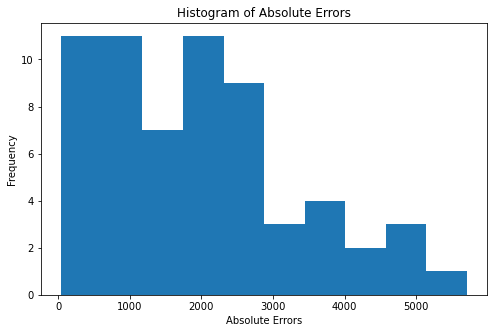

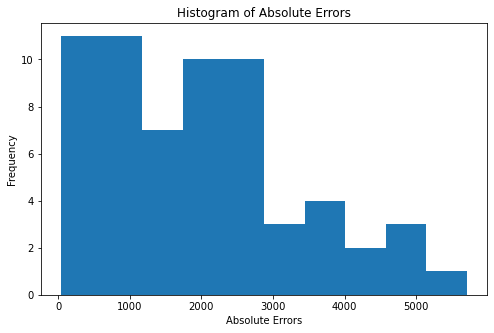

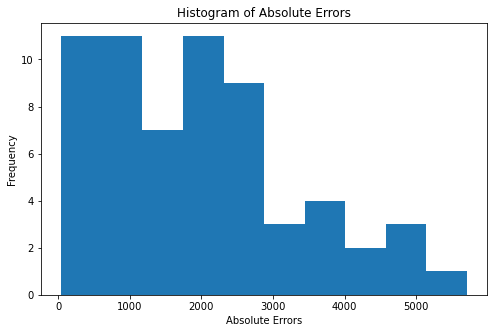

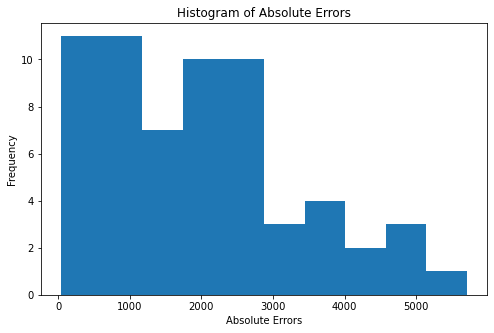

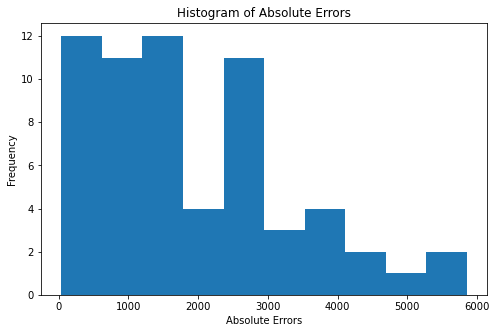

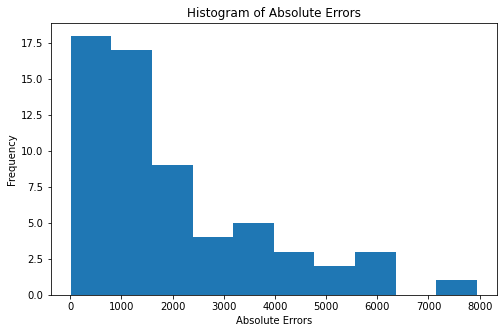

[19:53:42] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


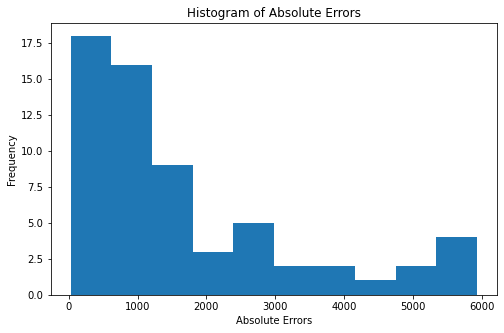

OLS
MAE on test data: 1957.238781093775
RMSE on test data: 2399.6054866537593
R squared on test data: -0.21041856101460676
MAPE on test data: 45.62301213845993


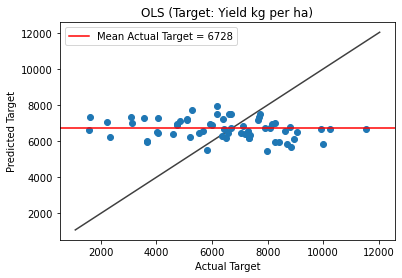

Lasso
MAE on test data: 1956.3473586779573
RMSE on test data: 2398.568970812509
R squared on test data: -0.2093730999567358
MAPE on test data: 45.61701106298404


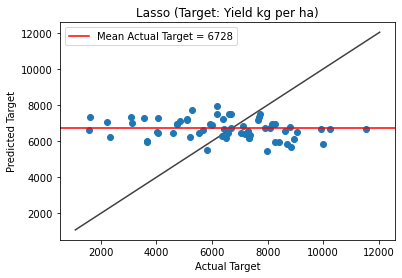

Ridge
MAE on test data: 1956.1148044394326
RMSE on test data: 2398.5206382947763
R squared on test data: -0.2093243613475153
MAPE on test data: 45.60621864579735


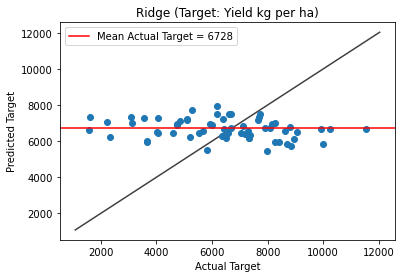

ElasticNet
MAE on test data: 1956.458913702782
RMSE on test data: 2398.6972590801647
R squared on test data: -0.20950247086990292
MAPE on test data: 45.617762969274764


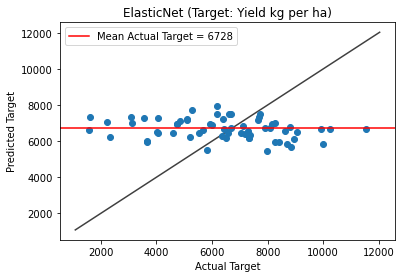

SVR
MAE on test data: 1910.6454672495959
RMSE on test data: 2354.8219946049676
R squared on test data: -0.16566041745664917
MAPE on test data: 46.16708719978202


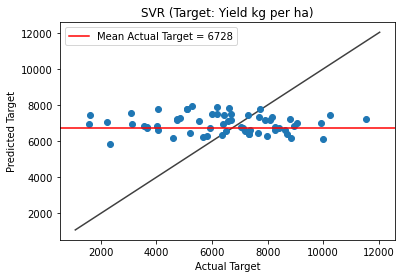

GBR
MAE on test data: 1988.5390023232196
RMSE on test data: 2680.0674415342346
R squared on test data: -0.5098970192667469
MAPE on test data: 42.36403024149549


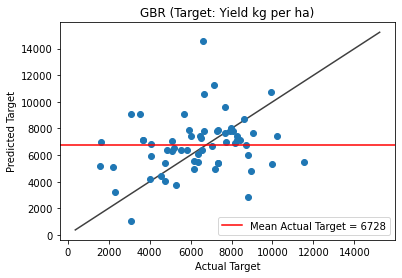

XGBoost
MAE on test data: 1670.362518270571
RMSE on test data: 2295.8994680068204
R squared on test data: -0.10805576335831146
MAPE on test data: 36.362152297582966


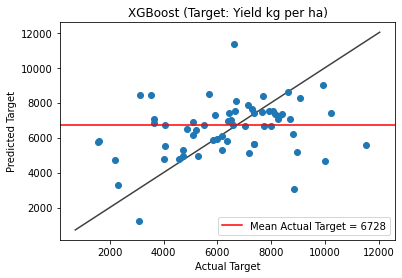

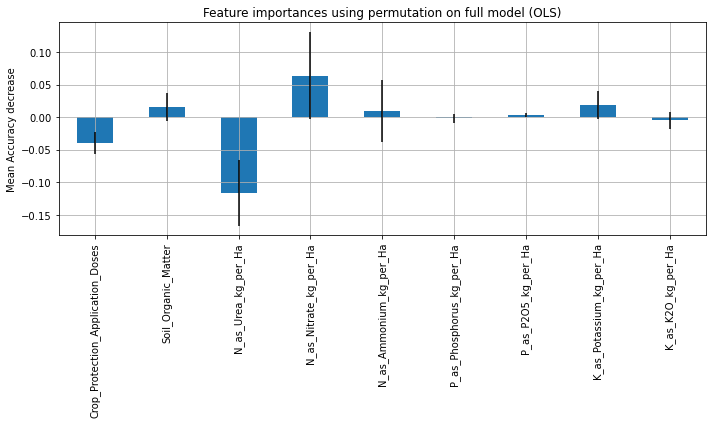

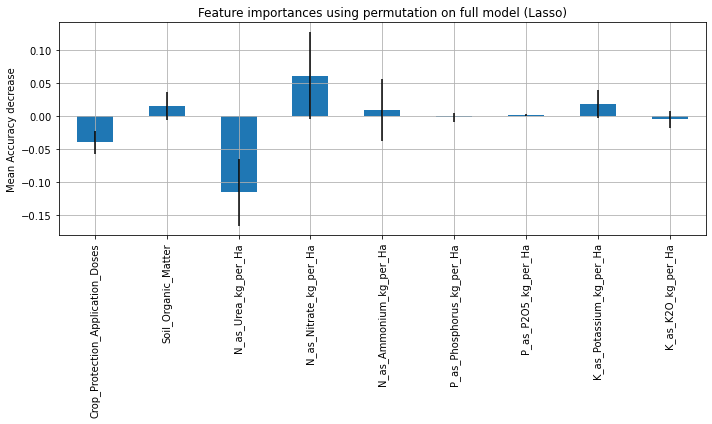

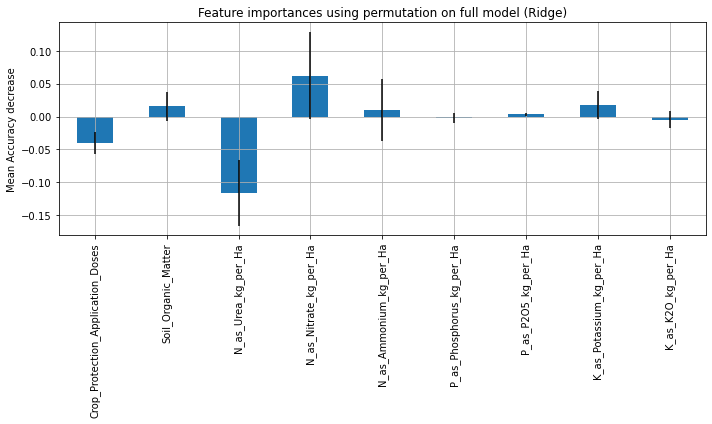

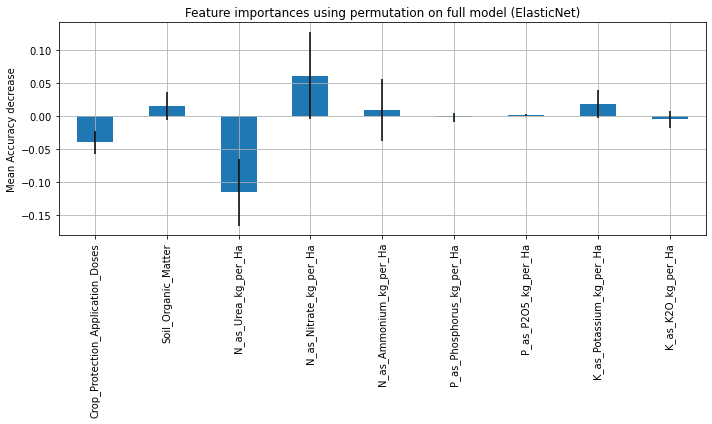

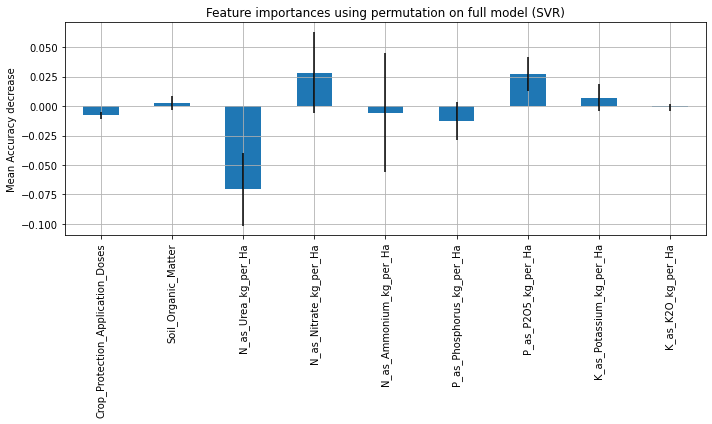

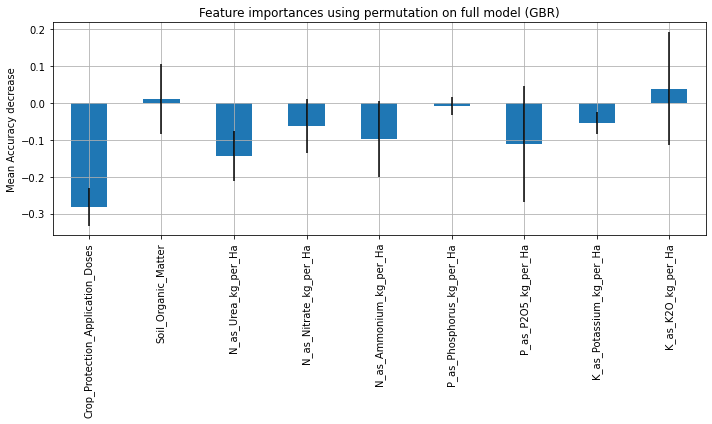

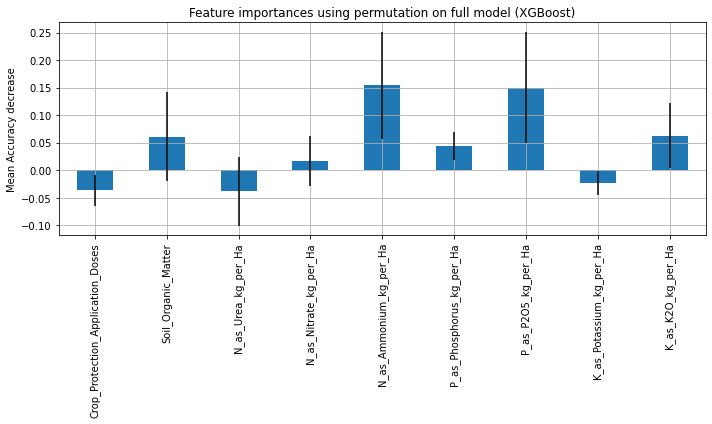

In [12]:
#Winter
#Crop Protection Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_crop_protection_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_crop_protection_cluster_0 = df_crop_protection_cluster_0.drop(columns = ['cluster'])

print(display(df_crop_protection_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_crop_protection_cluster_0, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

Crop_Protection_Application_Doses  Soil_Organic_Matter  Yield_kg_per_Ha  \
0                                 14.0             2.500000      3049.333333   
1                                 13.0             2.500000      3116.200000   
2                                  9.0             2.500000      7678.888889   
3                                  9.0             2.500000      7756.363636   
4                                 10.0             2.500000      8235.200000   
..                                 ...                  ...              ...   
301                               15.0             2.660000      5880.000000   
302                               15.0             2.800000      5392.731742   
303                               15.0             2.597851      4073.493976   
304                               17.0             3.120000      6969.677419   
305                               17.0             3.240000      7954.666667   

     N_as_Urea_kg_per_Ha  N_as_Nitrate_kg_per_Ha  N_as_Ammonium_kg_per_Ha  \
0                    0.0                   205.5                     0.00   
1                  138.0                    60.0                     0.00   
2                  151.8                    18.0                    32.05   
3                  128.8                    18.0                    32.05   
4                  128.8                    18.0                    32.05   
..                   ...                     ...                      ...   
301                 92.0                    36.0                     0.00   
302                  0.0                     0.0                    44.10   
303                 92.0                     0.0                     0.00   
304                 92.0                     0.0                     0.00   
305                207.0                     0.0                     0.00   

     P_as_Phosphorus_kg_per_Ha  P_as_P2O5_kg_per_Ha  K_as_Potassium_kg_per_Ha  \
0                         48.0                  0.0                      48.0   
1                         60.0                  0.0                      60.0   
2                         90.0                  2.6                      96.0   
3                         90.0                  2.6                      90.0   
4                         90.0                  2.6                     102.0   
..                         ...                  ...                       ...   
301                       86.4                  0.0                      36.0   
302                        0.0                  0.0                       0.0   
303                        0.0                  0.0                       0.0   
304                        0.0                  0.0                       0.0   
305                        0.0                  0.0                       0.0   

     K_as_K2O_kg_per_Ha  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
..                  ...  
301                 0.0  
302               120.0  
303                 0.0  
304                 0.0  
305                 0.0  

[306 rows x 10 columns]

None


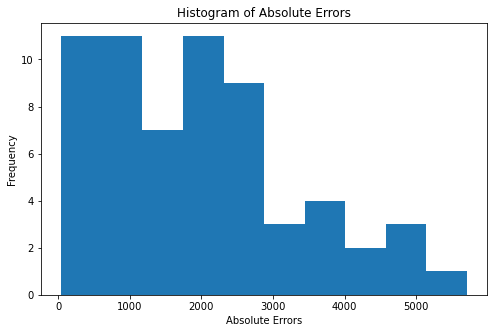

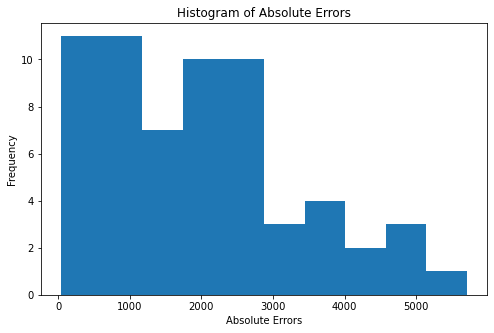

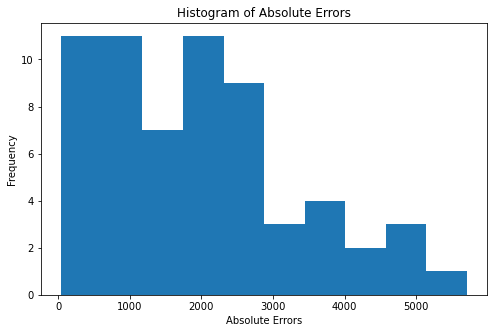

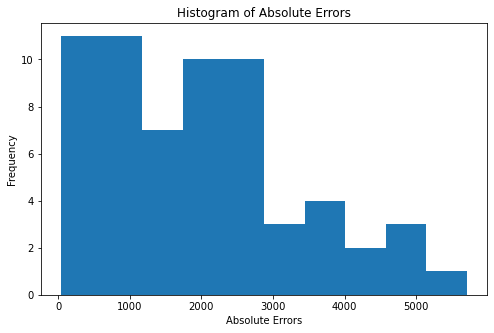

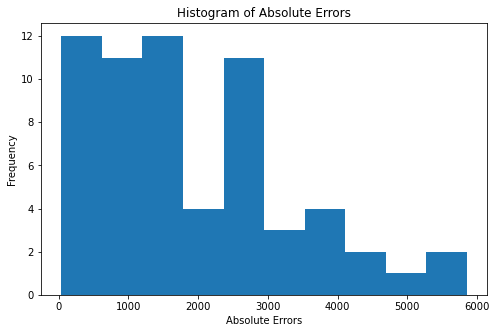

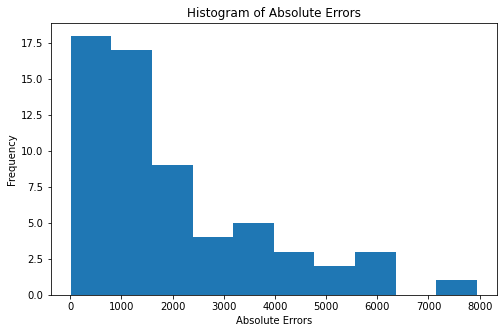

[19:54:45] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


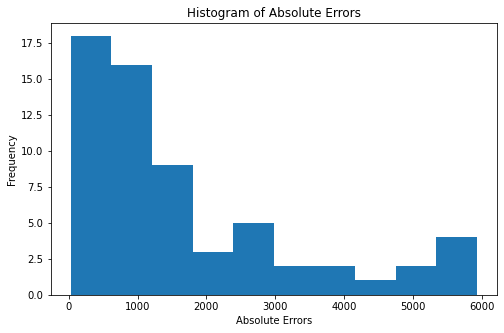

OLS
MAE on test data: 1957.238781093775
RMSE on test data: 2399.6054866537593
R squared on test data: -0.21041856101460676
MAPE on test data: 45.62301213845993


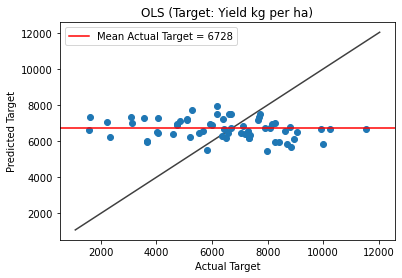

Lasso
MAE on test data: 1956.3473586779573
RMSE on test data: 2398.568970812509
R squared on test data: -0.2093730999567358
MAPE on test data: 45.61701106298404


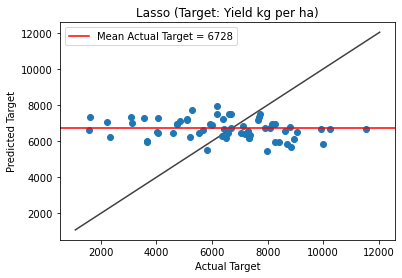

Ridge
MAE on test data: 1956.1148044394326
RMSE on test data: 2398.5206382947763
R squared on test data: -0.2093243613475153
MAPE on test data: 45.60621864579735


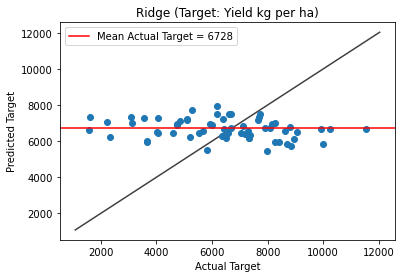

ElasticNet
MAE on test data: 1956.458913702782
RMSE on test data: 2398.6972590801647
R squared on test data: -0.20950247086990292
MAPE on test data: 45.617762969274764


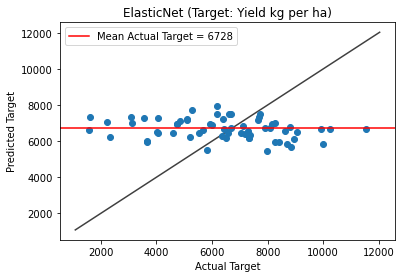

SVR
MAE on test data: 1910.6454672495959
RMSE on test data: 2354.8219946049676
R squared on test data: -0.16566041745664917
MAPE on test data: 46.16708719978202


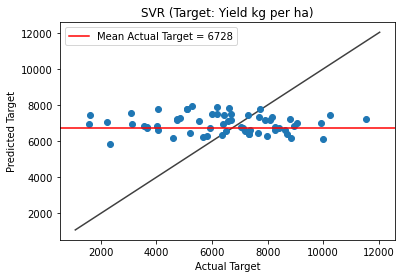

GBR
MAE on test data: 1988.5390023232196
RMSE on test data: 2680.0674415342346
R squared on test data: -0.5098970192667469
MAPE on test data: 42.36403024149549


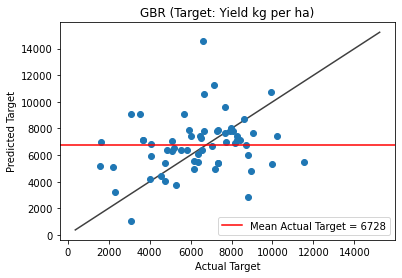

XGBoost
MAE on test data: 1670.362518270571
RMSE on test data: 2295.8994680068204
R squared on test data: -0.10805576335831146
MAPE on test data: 36.362152297582966


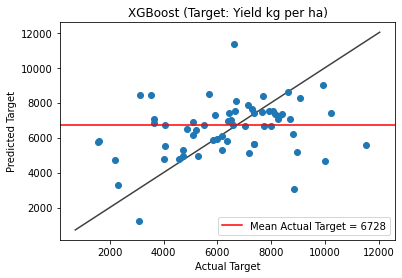

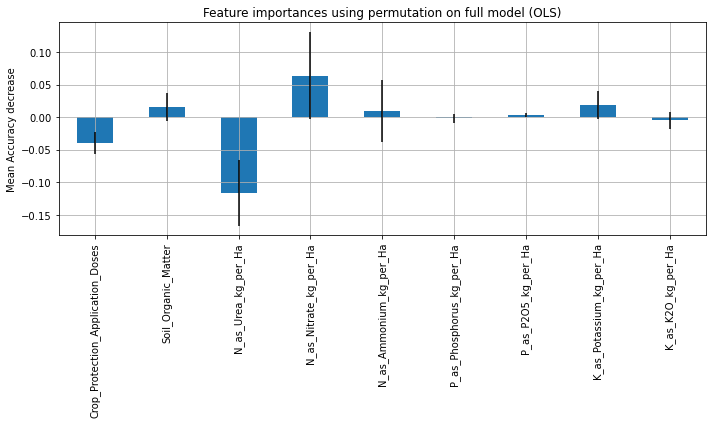

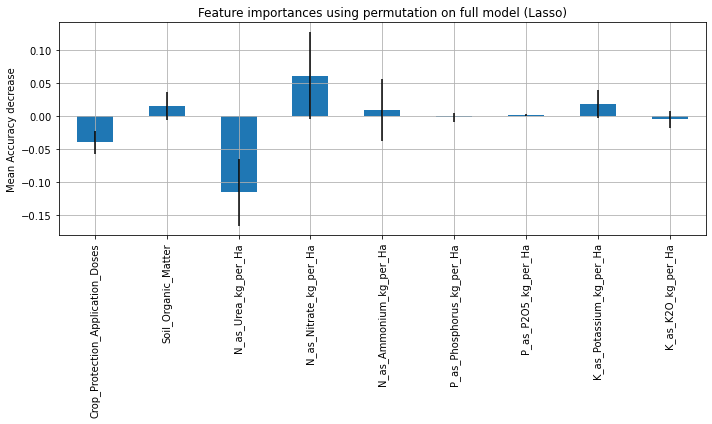

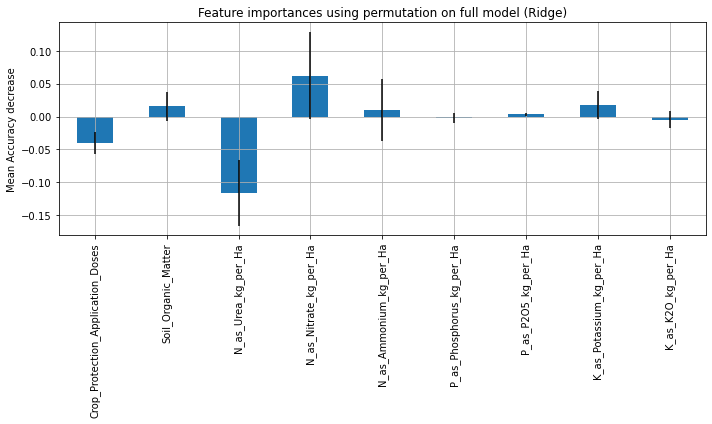

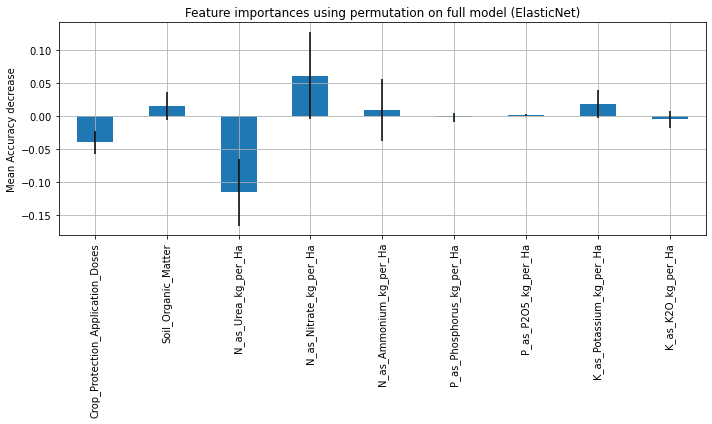

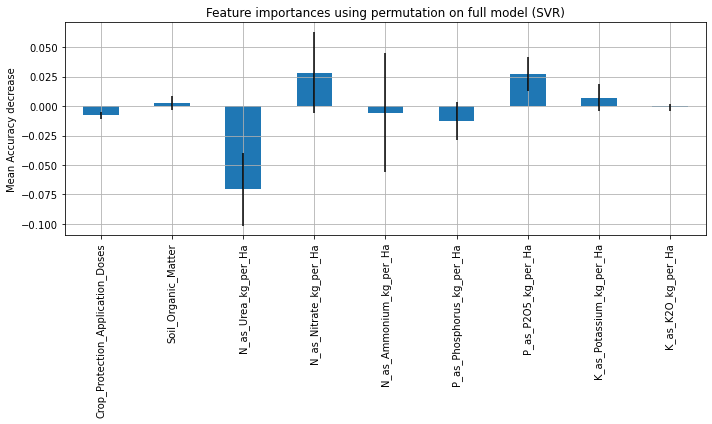

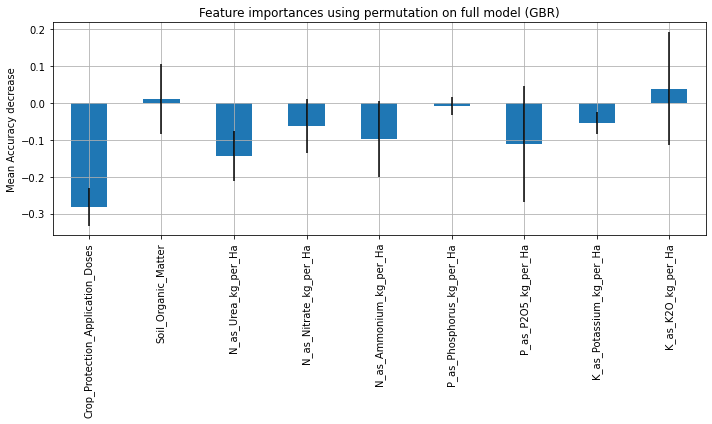

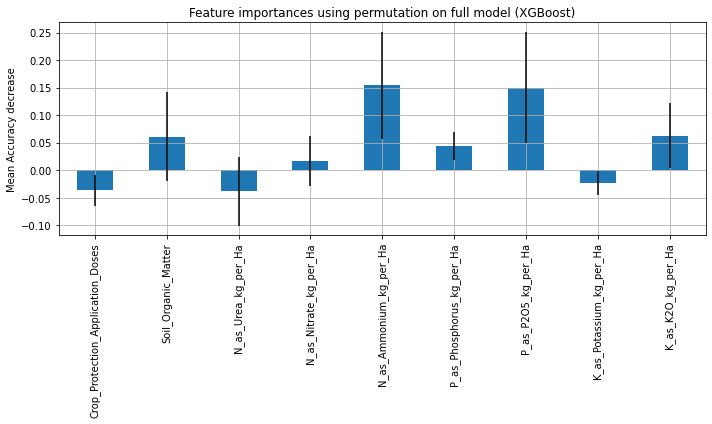

In [13]:
#Winter
#Crop Protection Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_crop_protection_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_crop_protection_cluster_1 = df_crop_protection_cluster_1.drop(columns = ['cluster'])

print(display(df_crop_protection_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_crop_protection_cluster_1, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Crop Protection Winter Parent Compound:
#1.No good prediction

In [ ]:
#Summer
#SOM Cluster 0, Crop Protection Application Doses Clustering

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

sum_of_squared_distances = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_SOM_cluster_0['Crop_Protection_Application_Doses'].values.reshape(-1,1))
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1,11), sum_of_squared_distances, 'bx-')
plt.xlabel('Num Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
#Summer
#SOM Cluster 0, Crop Protection Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_SOM_cluster_0['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df_SOM_cluster_0['cluster'] = kmeans.labels_

df_SOM_cluster_0_crop_protection_cluster_0 = df_SOM_cluster_0[df_SOM_cluster_0['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0_crop_protection_cluster_0 = df_SOM_cluster_0_crop_protection_cluster_0.drop(columns = ['cluster'])

print(display(df_SOM_cluster_0_crop_protection_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0_crop_protection_cluster_0, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Summer
#SOM Cluster 0, Crop Protection Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_SOM_cluster_0['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df_SOM_cluster_0['cluster'] = kmeans.labels_

df_SOM_cluster_0_crop_protection_cluster_1 = df_SOM_cluster_0[df_SOM_cluster_0['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_0_crop_protection_cluster_1 = df_SOM_cluster_0_crop_protection_cluster_1.drop(columns = ['cluster'])

print(display(df_SOM_cluster_0_crop_protection_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0_crop_protection_cluster_1, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Summer
#SOM Cluster 1, Crop Protection Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_SOM_cluster_1['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df_SOM_cluster_1['cluster'] = kmeans.labels_

df_SOM_cluster_1_crop_protection_cluster_0 = df_SOM_cluster_1[df_SOM_cluster_1['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_1_crop_protection_cluster_0 = df_SOM_cluster_1_crop_protection_cluster_0.drop(columns = ['cluster'])

print(display(df_SOM_cluster_1_crop_protection_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1_crop_protection_cluster_0, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Summer
#SOM Cluster 1, Crop Protection Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_summer_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_SOM_cluster_1['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df_SOM_cluster_1['cluster'] = kmeans.labels_

df_SOM_cluster_1_crop_protection_cluster_1 = df_SOM_cluster_1[df_SOM_cluster_1['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1_crop_protection_cluster_1 = df_SOM_cluster_1_crop_protection_cluster_1.drop(columns = ['cluster'])

print(display(df_SOM_cluster_1_crop_protection_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1_crop_protection_cluster_1, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Winter
#SOM Cluster 0, Crop Protection Application Doses Clustering

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

sum_of_squared_distances = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_SOM_cluster_0['Crop_Protection_Application_Doses'].values.reshape(-1,1))
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(range(1,11), sum_of_squared_distances, 'bx-')
plt.xlabel('Num Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
#Winter
#SOM Cluster 0, Crop Protection Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_SOM_cluster_0['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df_SOM_cluster_0['cluster'] = kmeans.labels_

df_SOM_cluster_0_crop_protection_cluster_0 = df_SOM_cluster_0[df_SOM_cluster_0['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0_crop_protection_cluster_0 = df_SOM_cluster_0_crop_protection_cluster_0.drop(columns = ['cluster'])

print(display(df_SOM_cluster_0_crop_protection_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0_crop_protection_cluster_0, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Winter
#SOM Cluster 0, Crop Protection Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_0 = df[df['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_0 = df_SOM_cluster_0.drop(columns = ['cluster'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_SOM_cluster_0['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df_SOM_cluster_0['cluster'] = kmeans.labels_

df_SOM_cluster_0_crop_protection_cluster_1 = df_SOM_cluster_0[df_SOM_cluster_0['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_0_crop_protection_cluster_1 = df_SOM_cluster_0_crop_protection_cluster_1.drop(columns = ['cluster'])

print(display(df_SOM_cluster_0_crop_protection_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_0_crop_protection_cluster_1, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Winter
#SOM Cluster 1, Crop Protection Cluster 0

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_SOM_cluster_1['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df_SOM_cluster_1['cluster'] = kmeans.labels_

df_SOM_cluster_1_crop_protection_cluster_0 = df_SOM_cluster_1[df_SOM_cluster_1['cluster'] == 0].reset_index(drop = True)
df_SOM_cluster_1_crop_protection_cluster_0 = df_SOM_cluster_1_crop_protection_cluster_0.drop(columns = ['cluster'])

print(display(df_SOM_cluster_1_crop_protection_cluster_0))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1_crop_protection_cluster_0, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()

In [ ]:
#Winter
#SOM Cluster 1, Crop Protection Cluster 1

df = pd.read_csv('/mnt/Datasets/df_3_27_23_winter_parent_compounds.csv').drop(columns = 'Unnamed: 0')
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df['Soil_Organic_Matter'].values.reshape(-1,1))
df['cluster'] = kmeans.labels_

df = df.drop(columns = ['CO2_kg_per_Ha'])

df_SOM_cluster_1 = df[df['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1 = df_SOM_cluster_1.drop(columns = ['cluster'])

kmeans = KMeans(n_clusters = 2)
kmeans.fit(df_SOM_cluster_1['Crop_Protection_Application_Doses'].values.reshape(-1,1))
df_SOM_cluster_1['cluster'] = kmeans.labels_

df_SOM_cluster_1_crop_protection_cluster_1 = df_SOM_cluster_1[df_SOM_cluster_1['cluster'] == 1].reset_index(drop = True)
df_SOM_cluster_1_crop_protection_cluster_1 = df_SOM_cluster_1_crop_protection_cluster_1.drop(columns = ['cluster'])

print(display(df_SOM_cluster_1_crop_protection_cluster_1))

train_Yield_kg_per_ha, test_Yield_kg_per_ha = train_test_split(df_SOM_cluster_1_crop_protection_cluster_1, test_size = 0.2, random_state = 60)

bootstrap_sample = train_Yield_kg_per_ha.sample(5000, replace=True, random_state=1)
train_Yield_kg_per_ha = pd.concat([train_Yield_kg_per_ha, bootstrap_sample])

X_train_Yield_kg_per_ha = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])
X_test_Yield_kg_per_ha = test_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha'])

standard_scaler_X = StandardScaler().fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = standard_scaler_X.transform(X_train_Yield_kg_per_ha)

power_transform_X = PowerTransformer(standardize = True).fit(X_train_Yield_kg_per_ha)
X_train_Yield_kg_per_ha = power_transform_X.transform(X_train_Yield_kg_per_ha)

X_test_Yield_kg_per_ha = standard_scaler_X.transform(X_test_Yield_kg_per_ha)
X_test_Yield_kg_per_ha = power_transform_X.transform(X_test_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = np.array(train_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

mean_Yield_kg_per_ha = y_train_Yield_kg_per_ha.mean()

y_test_Yield_kg_per_ha = np.array(test_Yield_kg_per_ha['Yield_kg_per_Ha']).reshape(-1, 1)

standard_scaler_y = StandardScaler().fit(np.array(y_train_Yield_kg_per_ha))

y_train_Yield_kg_per_ha = standard_scaler_y.transform(y_train_Yield_kg_per_ha)

power_transform_y = PowerTransformer(standardize = False).fit(y_train_Yield_kg_per_ha)

y_train_Yield_kg_per_ha = power_transform_y.transform(y_train_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = standard_scaler_y.transform(y_test_Yield_kg_per_ha)

y_test_Yield_kg_per_ha = power_transform_y.transform(y_test_Yield_kg_per_ha)

kfolds = KFold(n_splits = 10, shuffle = True, random_state = 42)

alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

model_names = ['OLS', 'Lasso', 'Ridge', 'ElasticNet', 'SVR', 'GBR', 'XGBoost']
models = [linear_model.LinearRegression(), \
            LassoCV(max_iter = int(1e7), alphas = alphas2, random_state = 42, cv = kfolds), \
                  RidgeCV(alphas = alphas_alt, cv = kfolds), \
                  ElasticNetCV(max_iter = int(1e7), alphas = e_alphas, cv = kfolds, l1_ratio = e_l1ratio), \
                  SVR(C = 20, epsilon = 0.008, gamma = 0.0003), \
                  GradientBoostingRegressor(n_estimators = 5000, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 15, \
                                            min_samples_split = 10, loss = 'huber', random_state = 42), \
                  XGBRegressor(learning_rate = 0.005, n_estimators = 10000, max_depth = 3, min_child_weight = 0, gamma = 0, subsample = 0.7, \
                               colsample_bytree = 0.7, objective = 'reg:linear', nthread = -1, scale_pos_weight = 1, seed = 27, reg_alpha = 0.00006)
         ]

fitted_models = []
Test_MAE_models = []
Test_RMSE_models = []
Test_R2_models = []
Test_mape_models = []
Test_errors = []

for model in models:
    fitted_models.append(model.fit(X_train_Yield_kg_per_ha, y_train_Yield_kg_per_ha))
    inv_transform_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[models.index(model)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))                                             
    Test_MAE_models.append(mae(inv_transform_y_actuals, inv_transformed_preds))
    Test_RMSE_models.append(rmse(inv_transform_y_actuals, inv_transformed_preds))
    Test_R2_models.append(r2(inv_transform_y_actuals, inv_transformed_preds))
    Test_mape_models.append(mape(inv_transform_y_actuals, inv_transformed_preds))
    Test_errors.append(errors(inv_transform_y_actuals, inv_transformed_preds))
    plt.figure(figsize = (8,5))
    plt.hist(np.sqrt((inv_transform_y_actuals - inv_transformed_preds)**2))
    plt.xlabel('Absolute Errors')
    plt.ylabel('Frequency')
    plt.title('Histogram of Absolute Errors')
    plt.show()
    
for model_name in model_names:
    print(model_name)
    print('MAE on test data: ' + str(Test_MAE_models[model_names.index(model_name)]))
    print('RMSE on test data: ' + str(Test_RMSE_models[model_names.index(model_name)]))
    print('R squared on test data: ' + str(Test_R2_models[model_names.index(model_name)]))
    print('MAPE on test data: ' + str(Test_mape_models[model_names.index(model_name)]))
    inv_transformed_y_actuals = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(y_test_Yield_kg_per_ha).reshape(-1, 1))
    inv_transformed_preds = standard_scaler_y.inverse_transform(power_transform_y.inverse_transform(fitted_models[model_names.index(model_name)].predict(X_test_Yield_kg_per_ha).reshape(-1,1)))
    fig, ax = plt.subplots()
    ax.axhline(y=mean_Yield_kg_per_ha, color='r', linestyle='-', label = 'Mean Actual Target = ' + str(int(mean_Yield_kg_per_ha)))
    ax.scatter(inv_transformed_y_actuals, inv_transformed_preds)
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title(model_name + ' (Target: Yield kg per ha)')
    plt.legend()
    plt.show()

from sklearn.inspection import permutation_importance

for i in range(len(fitted_models)):
    feature_names = train_Yield_kg_per_ha.drop(columns = ['Yield_kg_per_Ha']).columns

    result = permutation_importance(
        fitted_models[i], X_test_Yield_kg_per_ha, y_test_Yield_kg_per_ha, n_repeats=10, random_state=42, n_jobs=2
    )

    model_importances = pd.Series(result.importances_mean, index = feature_names)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    model_importances.plot.bar(yerr = result.importances_std, ax = ax)
    ax.set_title("Feature importances using permutation on full model (" + str(model_names[i]) + ')')
    ax.set_ylabel("Mean Accuracy decrease")
    plt.grid()
    fig.tight_layout()
    plt.show()